# Native Painted Turtles (cpb) 2008-2017
Statistical Analysis of a turtle population "Chysemmys picta belli" at two locations in the pacific north west surveyed between 2008 and 2017


## Data cleaning
turtles.py and helpers.py consist of custom helper functions and standard panda acrobatics to read data from excel and do some basic data transformation.

In [1]:
#Prepping the notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# my custom helper functions
import helpers as hlp
import turtles
import scipy
import pandas as pd
#filter data: Naitive turle and relevant
print ("Filtering Natives ...")
natives = turtles.get_clean_data()
natives = natives[natives['Weight']!=0]
natives = natives[natives['Carapace']!=0]
natives = natives[natives['Plastron']!=0]
natives = natives[natives['Species']=='Cpb']
print ("Done")


Filtering Natives ...
Loading data /Users/kim/Projects/turtles-way-down/source/Turtle Data.xls
2008
2009
2010
2011
2012
2013
2014
Cleaning decimals ...
Cleaning other values ...
Loading data /Users/kim/Projects/turtles-way-down/source/MF Trapping Data.xlsx
Cleaning decimals ...
Cleaning other values ...
Done


## EDA - Exploratory Data Analysis

### basic metrics

In [2]:
#Show some data - basic metrics
natives[['Carapace','Plastron','Annuli','Weight']].describe()

Carapace    Plastron      Annuli       Weight
count  888.000000  888.000000  888.000000   888.000000
mean   140.332336  132.643539    5.436937   470.087524
std     39.513756   38.517132    3.438044   362.312073
min     32.740002   29.730000    0.000000     7.050000
25%    110.362501  103.987499    3.000000   197.750000
50%    132.339996  125.000000    5.000000   318.000000
75%    175.520000  165.000000    7.000000   694.750000
max    237.199997  242.199997   20.000000  1435.000000

In [3]:
#Show some data - Gender, Location etc
natives[['Species','Capture Location','Source','ID']].pivot_table(index=['Capture Location','Source','Species'],aggfunc='count')

ID
Capture Location Source                                 Species     
Gresham          Turtle Data.xls|2008                   Cpb       48
                 Turtle Data.xls|2009                   Cpb       14
                 Turtle Data.xls|2010                   Cpb       48
                 Turtle Data.xls|2011                   Cpb      114
                 Turtle Data.xls|2012                   Cpb      187
                 Turtle Data.xls|2013                   Cpb      103
                 Turtle Data.xls|2014                   Cpb      225
Mason Flats      MF Trapping Data.xlsx|All Capture Data Cpb      149

### Swarmplots 
Swarmplots to show distribution of Carapace, Plastron and Weight by Gender

Plotting swarm plot with 888 samples...


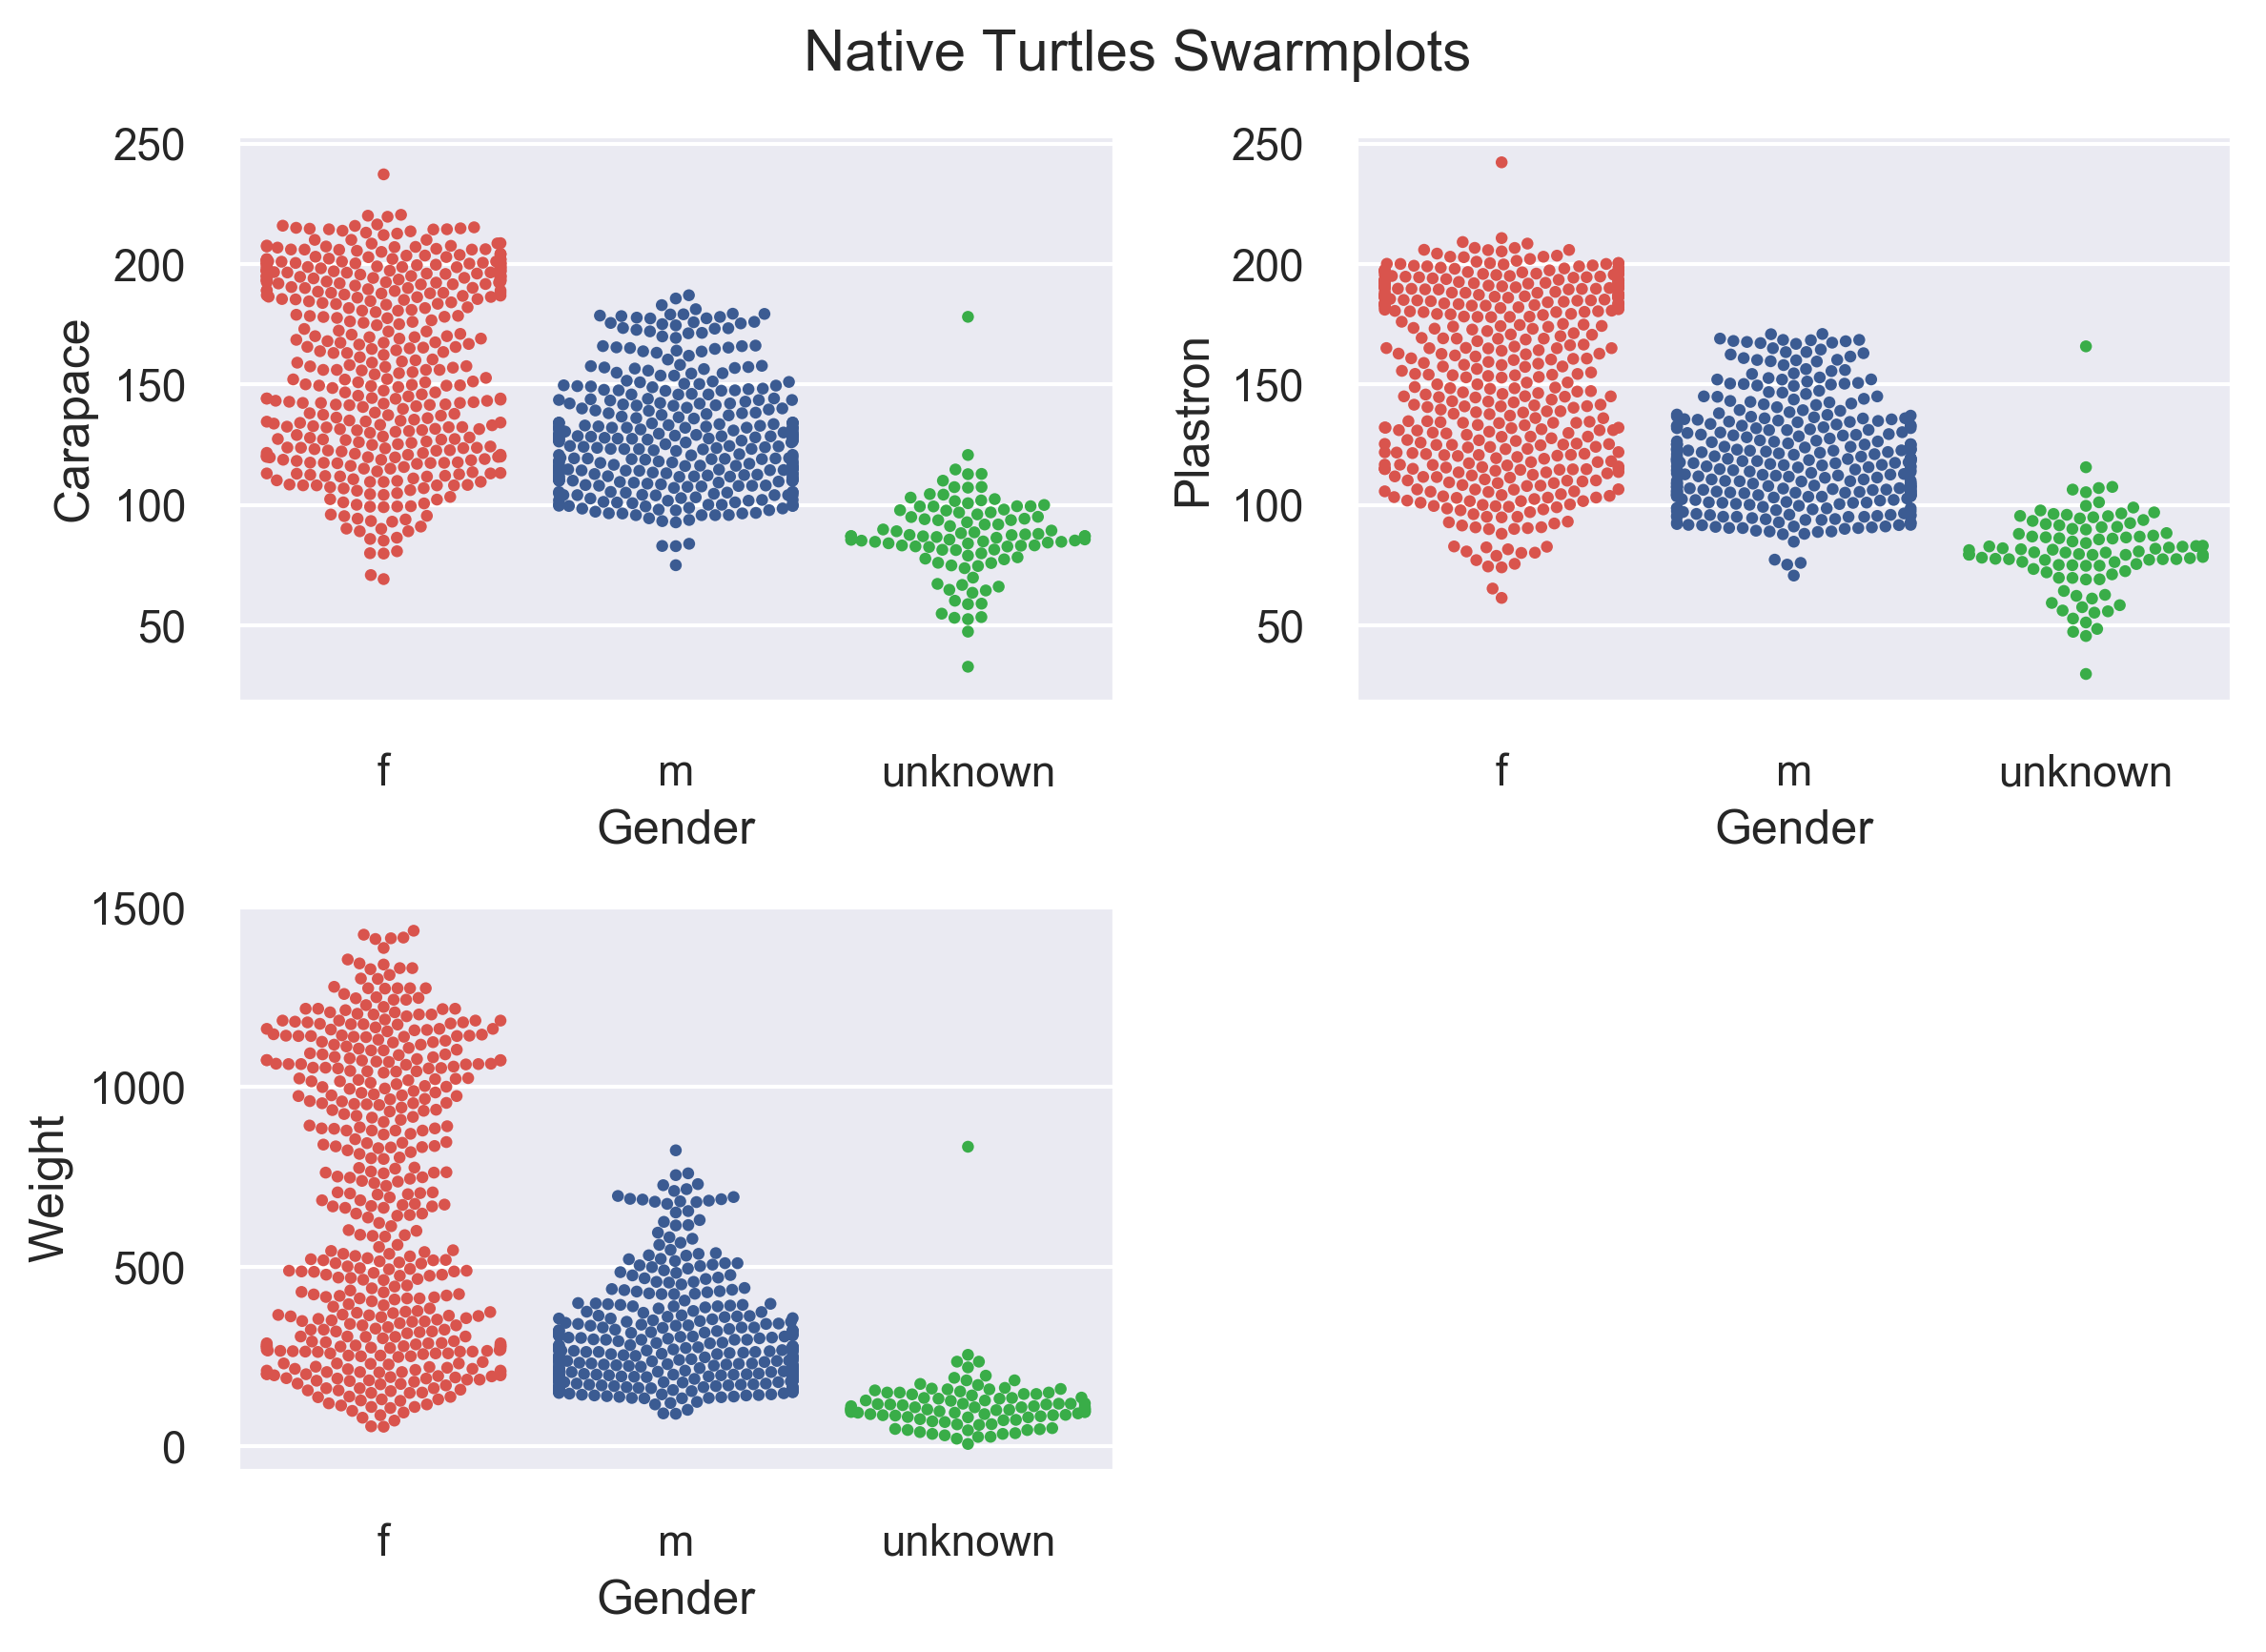

In [4]:
### Basic Swarmplot to show Carapace / Plastron / Weight by Gender
plt.style.use('seaborn-notebook')
plt.rcParams['figure.dpi'] = 300
colors = [sns.xkcd_rgb['pale red'],sns.xkcd_rgb['denim blue'],sns.xkcd_rgb['medium green']]

print ("Plotting swarm plot with " + str(natives.Weight.count()) + ' samples...')
sns.set()
_ = plt.figure(1)
_ = plt.suptitle('Native Turtles Swarmplots ')

_1 =plt.subplot(2,2,1)
_ = sns.swarmplot(x='Gender', y='Carapace', data=natives,size=3,palette=colors)
_ = plt.ylabel('Carapace')

_2 =plt.subplot(2,2,2,sharey=_1)
_ = sns.swarmplot(x='Gender', y='Plastron', data=natives,size=3,palette=colors)
_ = plt.ylabel('Plastron')
_ = plt.tight_layout(rect=[0, 0.03, 1, 0.95])
_ = plt.subplot(2,2,3)
_ = sns.swarmplot(x='Gender', y='Weight', data=natives,size=3,palette=colors)
_ = plt.xlabel('Gender')
_ = plt.ylabel('Weight')

In [5]:
natives_melted = natives.copy()
natives_melted['Weight / 10'] = natives_melted.Weight.div(10)
natives_melted = pd.melt(natives_melted[['Carapace','Plastron','Weight / 10','Gender']],'Gender',var_name='measurement')

_ = sns.swarmplot(x="measurement", y="value", hue="Gender", data=natives_melted,palette=colors)
_ = plt.show()

### ECDFs
using Empirical Cumulative Distribution Function do display exactly the same information as the swarmplots above.

Plotting Cumulative Distribution Function with 888 samples...


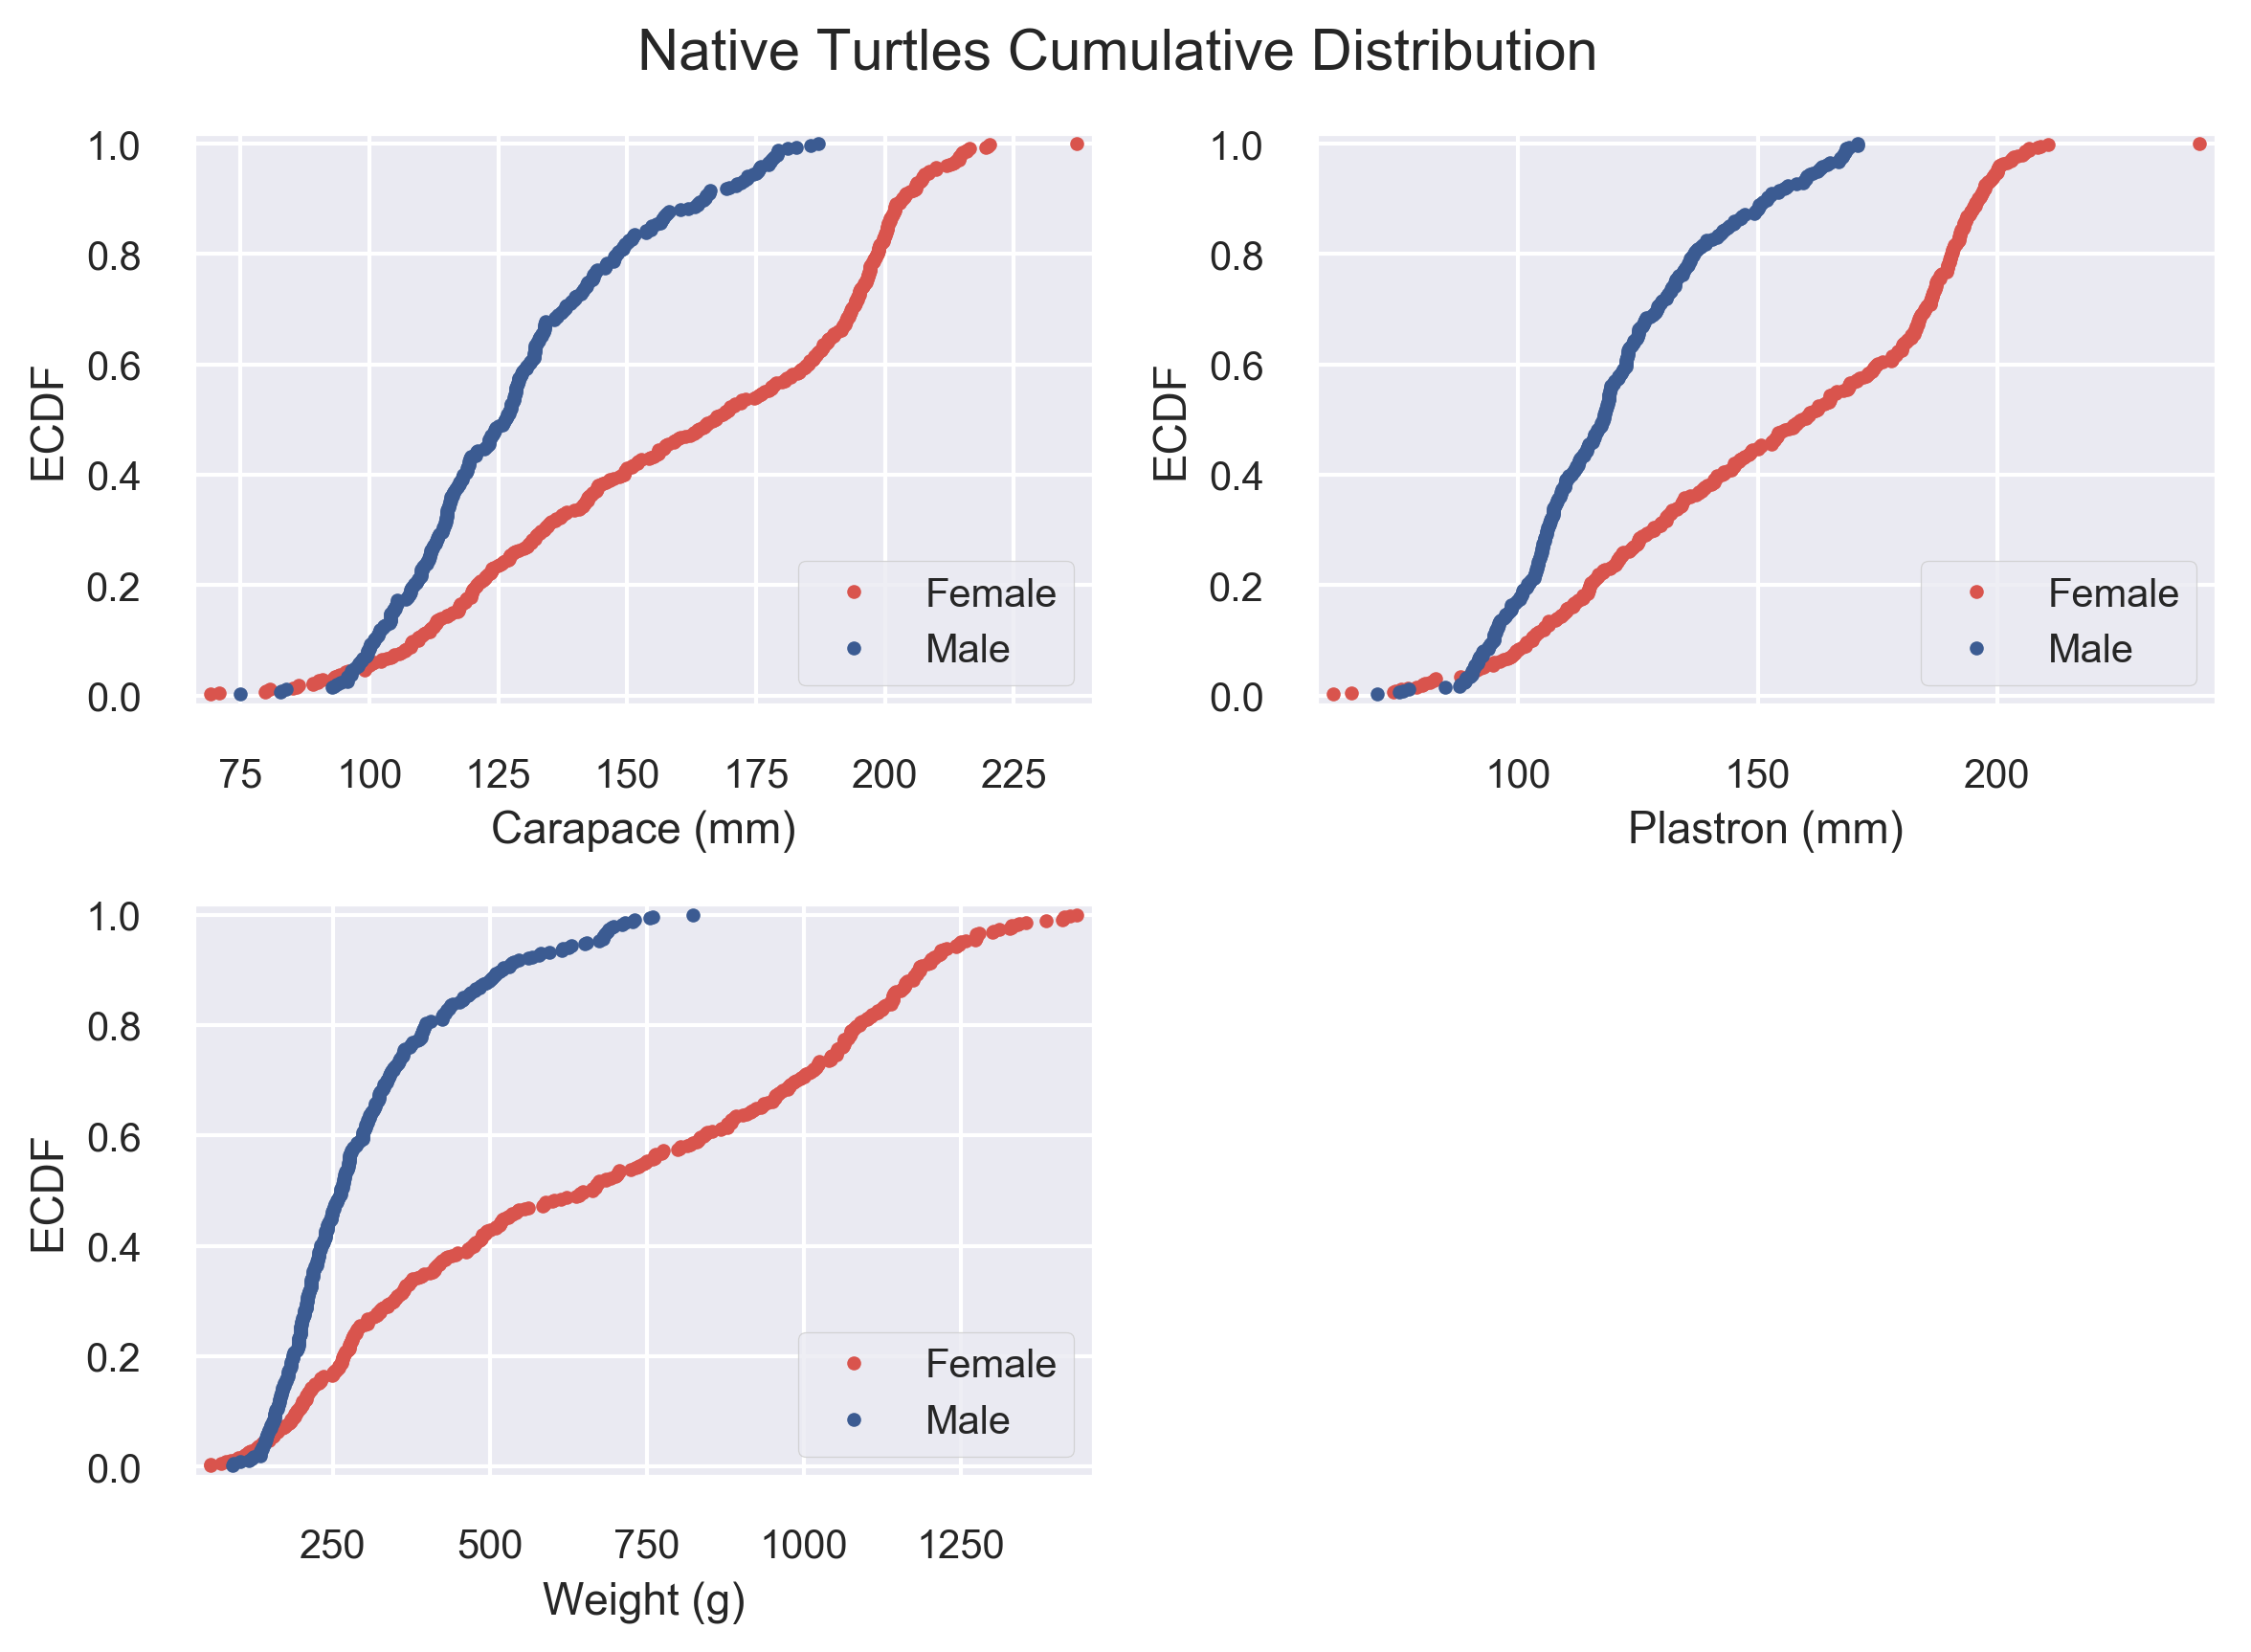

In [6]:
### Same information as beswars above just displayed as ECDFs
plt.style.use('seaborn-notebook')
plt.rcParams['figure.dpi'] = 300
colors = [sns.xkcd_rgb['pale red'],sns.xkcd_rgb['denim blue']]


print ("Plotting Cumulative Distribution Function with " + str(natives.Weight.count()) + ' samples...')
# Compute ECDFs

_ = plt.figure(2)
_ = plt.suptitle('Native Turtles Cumulative Distribution ')

x_CarapaceF, y_CarapaceF = hlp.ecdf(natives[natives['Gender']=='f']['Carapace'])
x_CarapaceM, y_CarapaceM = hlp.ecdf(natives[natives['Gender']=='m']['Carapace'])

_ = plt.subplot(2,2,1)
_ = plt.plot(x_CarapaceF, y_CarapaceF, marker='.',linestyle = 'none',color=colors[0])
_ = plt.plot(x_CarapaceM, y_CarapaceM, marker='.',linestyle = 'none',color=colors[1])
_ = plt.margins(0.02)
_ = plt.legend(('Female', 'Male'), loc='lower right')
_ = plt.xlabel('Carapace (mm)')
_ = plt.ylabel('ECDF')

x_PlastronF, y_PlastronF = hlp.ecdf(natives[natives['Gender']=='f']['Plastron'])
x_PlastronM, y_PlastronM = hlp.ecdf(natives[natives['Gender']=='m']['Plastron'])

_ = plt.subplot(2,2,2)
_ = plt.plot(x_PlastronF, y_PlastronF, marker='.',linestyle = 'none',color=colors[0])
_ = plt.plot(x_PlastronM, y_PlastronM, marker='.',linestyle = 'none',color=colors[1])
_ = plt.margins(0.02)
_ = plt.legend(('Female', 'Male'), loc='lower right')
_ = plt.xlabel('Plastron (mm)')
_ = plt.ylabel('ECDF')
_ = plt.tight_layout(rect=[0, 0.03, 1, 0.95])

x_WeightF, y_WeightF = hlp.ecdf(natives[natives['Gender']=='f']['Weight'])
x_WeightM, y_WeightM = hlp.ecdf(natives[natives['Gender']=='m']['Weight'])

_ = plt.subplot(2,2,3)
_ = plt.plot(x_WeightF, y_WeightF, marker='.',linestyle = 'none',color=colors[0])
_ = plt.plot(x_WeightM, y_WeightM, marker='.',linestyle = 'none',color=colors[1])
_ = plt.margins(0.02)
_ = plt.legend(('Female', 'Male'), loc='lower right')
_ = plt.xlabel('Weight (g)')
_ = plt.ylabel('ECDF')

## Looking at measures over time
### Heatmaps to show concentration of samples per Annuli and Gender (Male)

Plotting Histogram Weight, Carapace and Plastron with 358 samples...


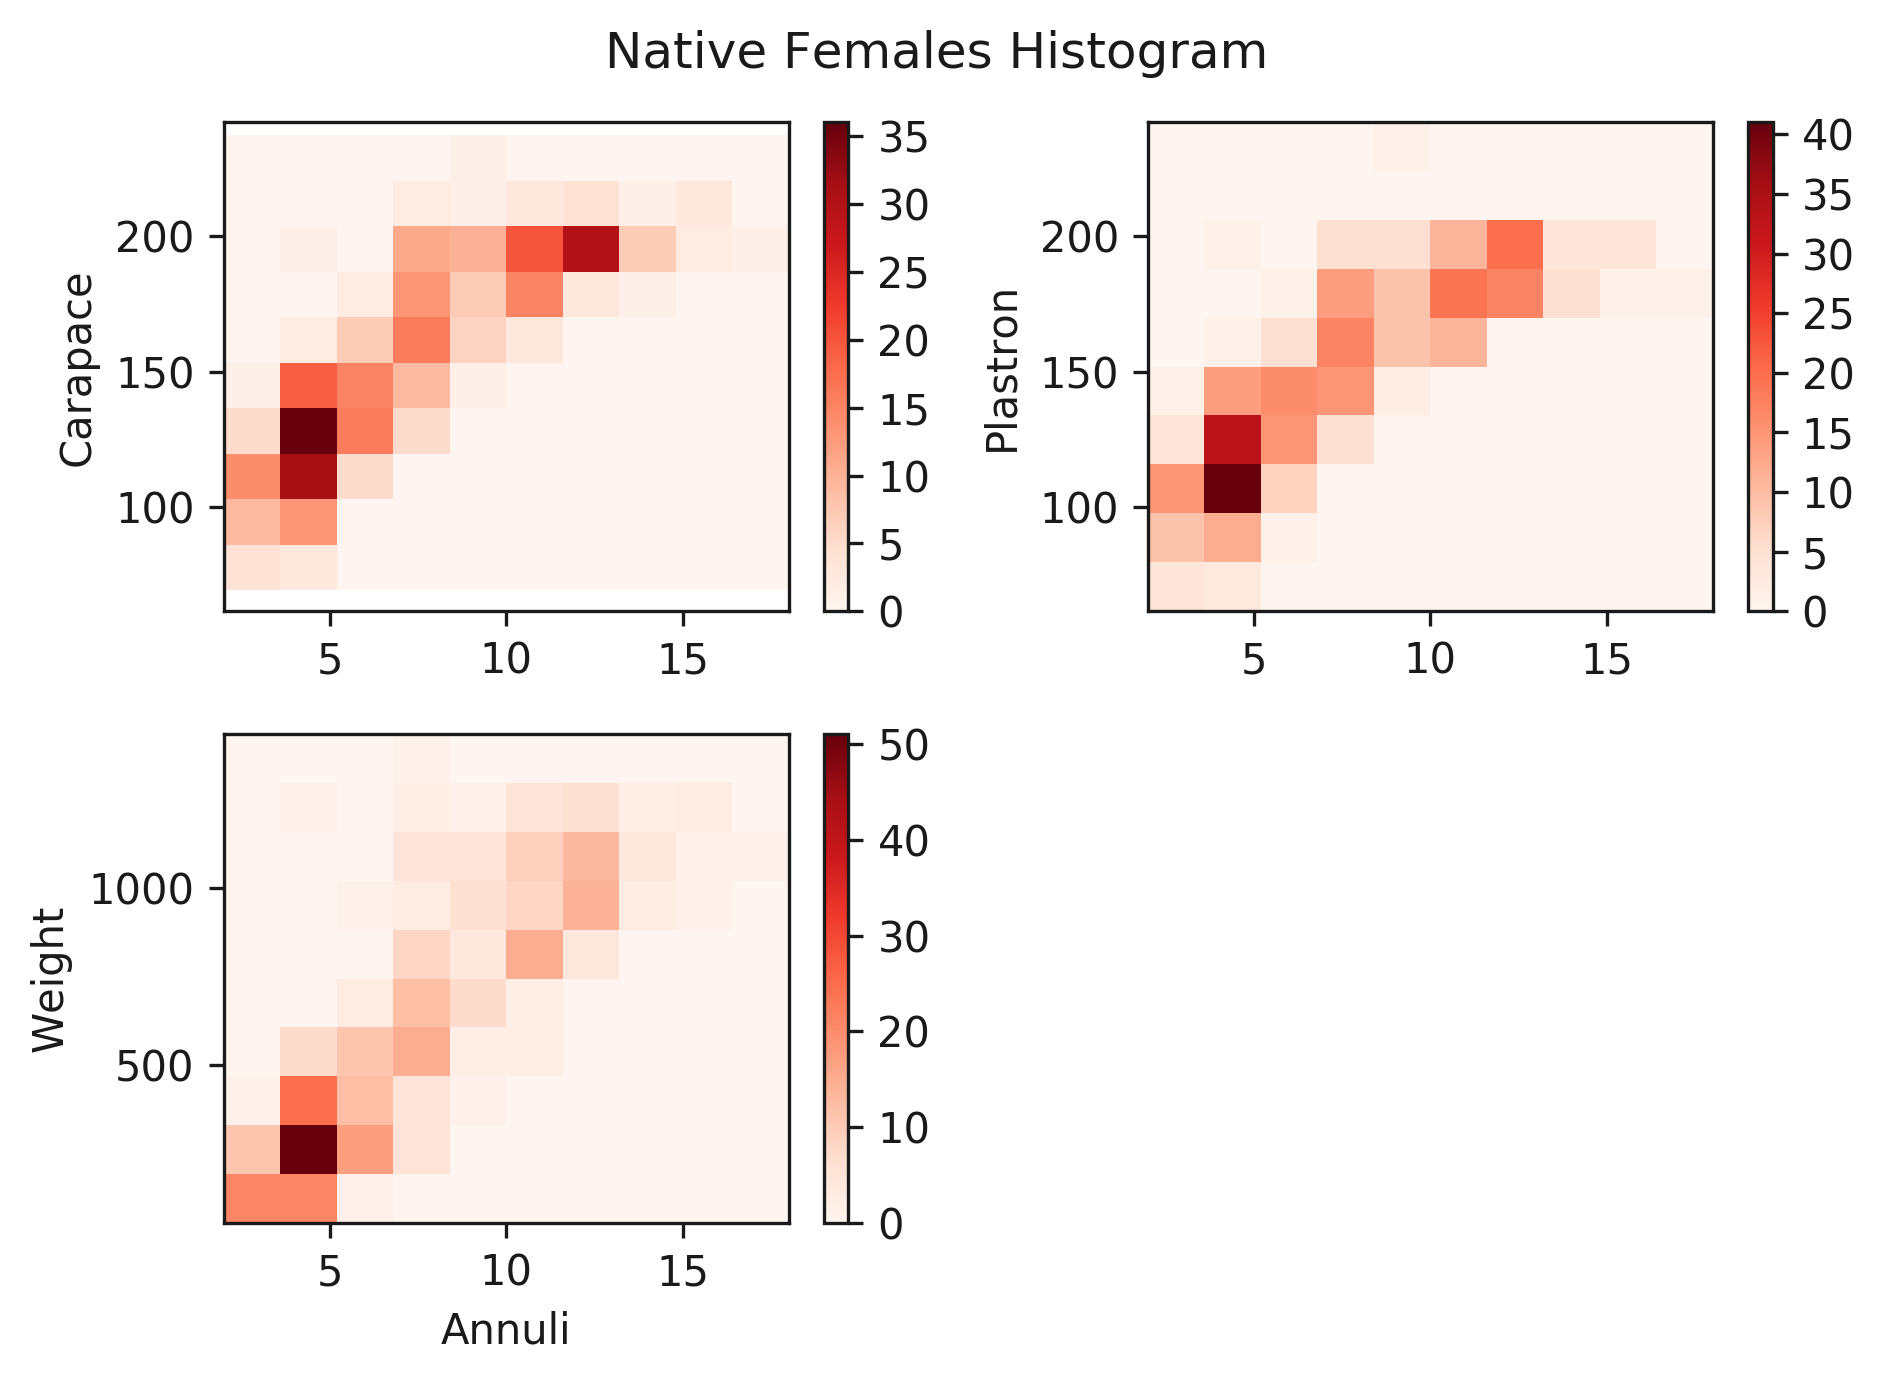

In [17]:
#2d histogram Carapace / Plastron / Weight - Females
sns.reset_orig()
#plt.style.use('seaborn-notebook')
plt.rcParams['figure.dpi'] = 300
## Lineplot Age + Weight, Carapace, Plastron

### FEMALE
females = natives[natives['Gender']=='f']
females = females[females['new_annuli']!=0]
print ("Plotting Histogram Weight, Carapace and Plastron with " + str(females.Weight.count()) + ' samples...')

_ = plt.figure(3)
_1 =plt.subplot(2,2,1)

#_ = plt.scatter(females['Annuli'], females['Carapace'])
_ = plt.hist2d(females['new_annuli'], females['Carapace'],cmap='Reds',bins=(10,10))
_ = plt.colorbar()
_ = plt.ylabel('Carapace')

_2 =plt.subplot(2,2,2,sharey=_1)
#_ = plt.scatter(females['Annuli'],females['Plastron'])
_ = plt.hist2d(females['new_annuli'], females['Plastron'],cmap='Reds',bins=(10,10))
_ = plt.colorbar()
_ = plt.ylabel('Plastron')

_ = plt.suptitle('Native Females Histogram ')
_ = plt.subplot(2,2,3)
#_ = plt.scatter(females['Annuli'], females['Weight'],s=10)
_ = plt.hist2d(females['new_annuli'], females['Weight'],cmap='Reds',bins=(10,10))
_ = plt.colorbar()
_ = plt.xlabel('Annuli')
_ = plt.ylabel('Weight')
_ = plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### Heatmaps to show concentration of samples per Annuli and Gender (Female)

Plotting Histogram Weight, Carapace and Plastron with 315 samples...


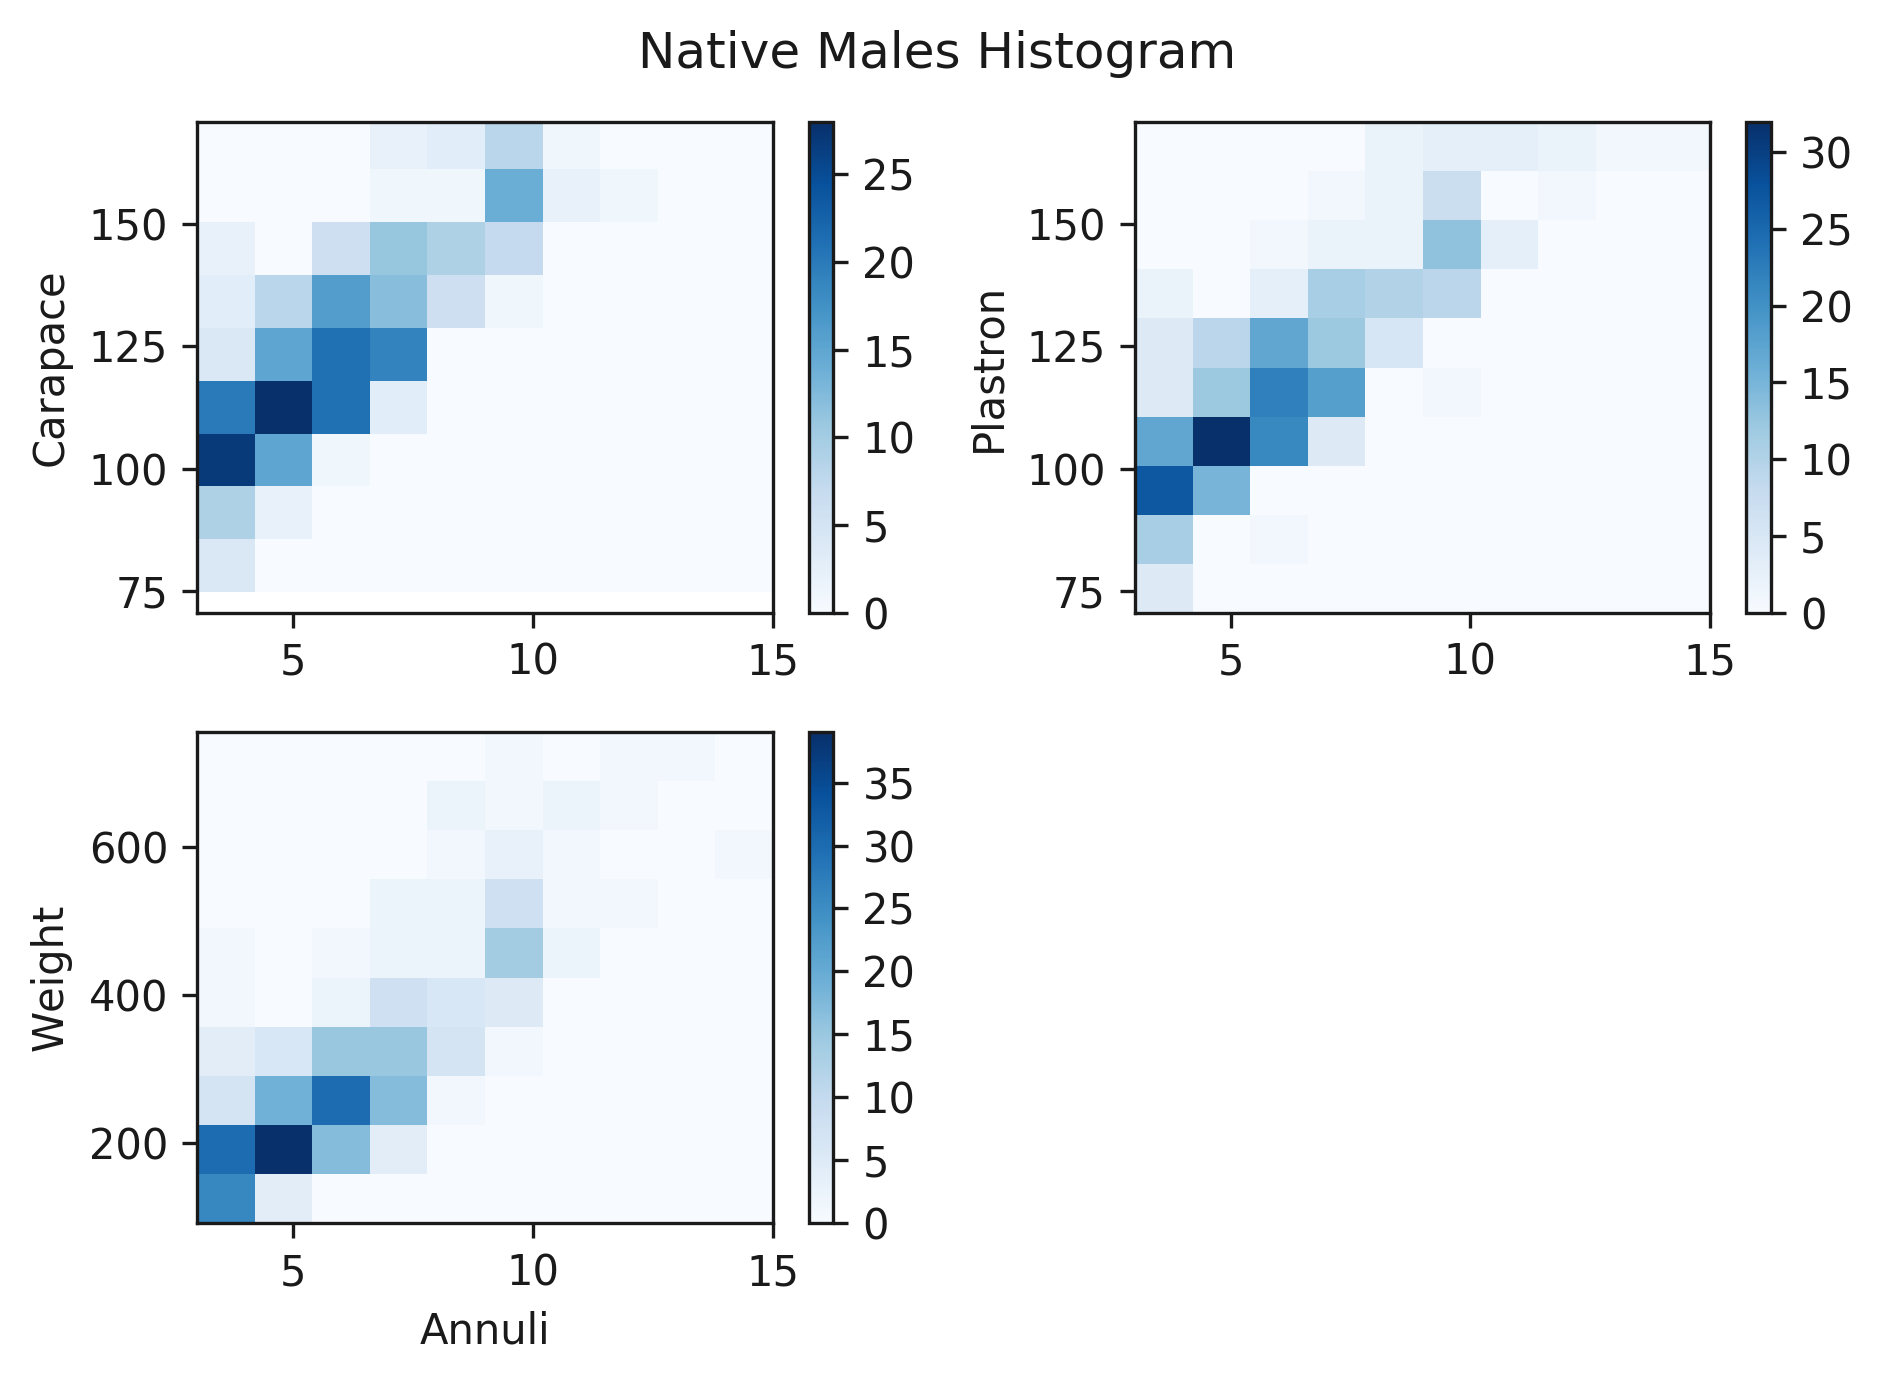

In [19]:
##2d histogram Carapace / Plastron / Weight - Males
sns.reset_orig()
#plt.style.use('seaborn-notebook')
plt.rcParams['figure.dpi'] = 300
## Lineplot Age + Weight, Carapace, Plastron

### MALE
males = natives[natives['Gender']=='m']
males = males[males['new_annuli']!=0]
print ("Plotting Histogram Weight, Carapace and Plastron with " + str(males.Weight.count()) + ' samples...')

_ = plt.figure(3)

_1 =plt.subplot(2,2,1)
#_ = plt.scatter(males['Annuli'], males['Carapace'])
_ = plt.hist2d(males['new_annuli'], males['Carapace'],cmap='Blues',bins=(10,10))
_ = plt.colorbar()
_ = plt.ylabel('Carapace')

_2 =plt.subplot(2,2,2,sharey=_1)
#_ = plt.scatter(males['Annuli'],males['Plastron'])
_ = plt.hist2d(males['new_annuli'], males['Plastron'],cmap='Blues',bins=(10,10))
_ = plt.colorbar()
_ = plt.ylabel('Plastron')

_ = plt.suptitle('Native Males Histogram ')
_ = plt.subplot(2,2,3)
#_ = plt.scatter(males['Annuli'], males['Weight'],s=10)
_ = plt.hist2d(males['new_annuli'], males['Weight'],cmap='Blues',bins=(10,10))
_ = plt.colorbar()
_ = plt.xlabel('Annuli')
_ = plt.ylabel('Weight')
_ = plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### Scatterplots to show concentration of samples per Annuli and Gender (Female)

Plotting swarm plot with hue with 673 samples...


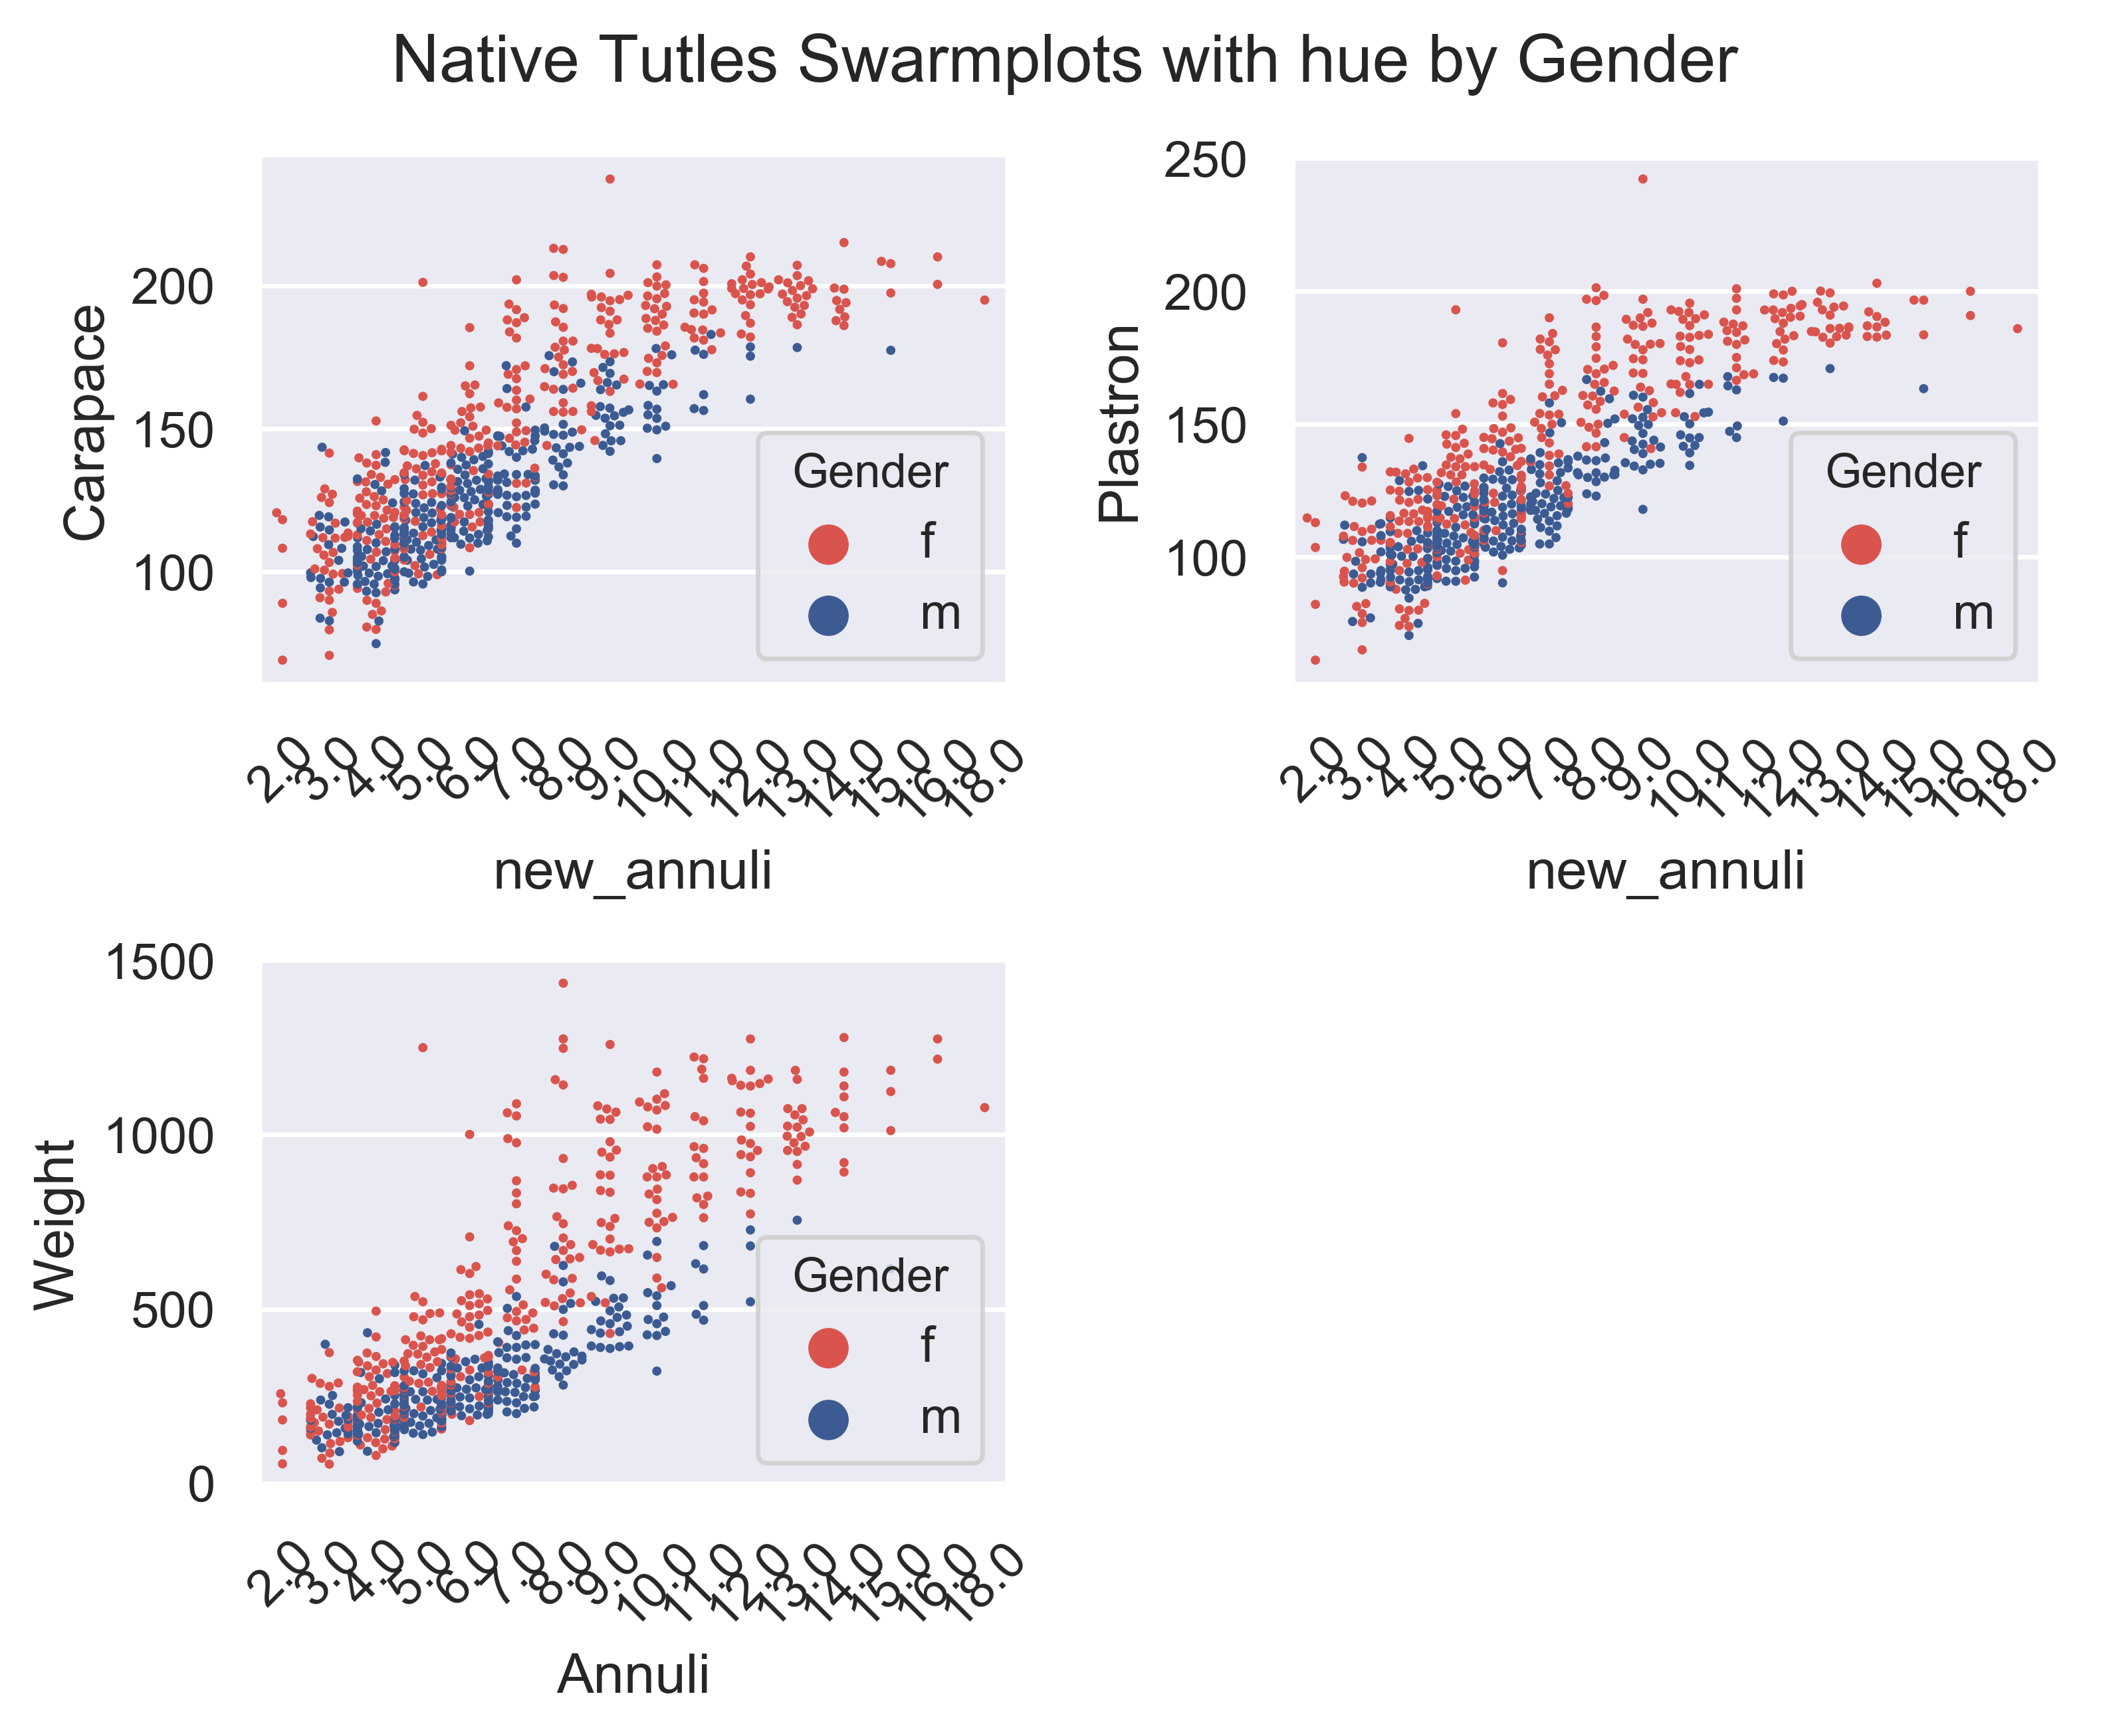

In [22]:
### Swarmplot with Hue (Keep this?)
natives = natives[natives['new_annuli']!=0]

#colors = [sns.xkcd_rgb['pale red'],sns.xkcd_rgb['denim blue'],sns.xkcd_rgb['medium green']]
colors = {'f':sns.xkcd_rgb['pale red'], 'm':sns.xkcd_rgb['denim blue'], 'unknown':sns.xkcd_rgb['medium green']}
plt.rcParams['figure.dpi'] = 500
print ("Plotting swarm plot with hue with " + str(natives.Weight.count()) + ' samples...')
sns.set()
_ = plt.figure(4)
_ = plt.suptitle('Native Tutles Swarmplots with hue by Gender')
_1 =plt.subplot(2,2,1)
#_ = plt.plot( 'Annuli', 'Carapace', data=natives, linestyle='', marker='o', markersize=0.7)
#_ = plt.scatter(natives['Annuli'],natives['Carapace'],s=10,c=natives['Gender'].apply(lambda x: colors[x]))
_ = sns.swarmplot(x='new_annuli', y='Carapace', hue='Gender',data=natives,dodge=False,size=2,palette=colors)
#_ = sns.lmplot(x='Annuli', y='Carapace', hue='Gender',data=natives,size=2,palette=colors)
#_ = sns.stripplot(x='Annuli', y='Carapace', hue='Gender',data=natives,dodge=True,jitter=True,size=2,palette=colors)
_ = plt.ylabel('Carapace')
_ = plt.xticks(rotation=45)

_2 = plt.subplot(2,2,2)
_ = sns.swarmplot(x='new_annuli', y='Plastron', hue='Gender',data=natives,dodge=False,size=2,palette=colors)
_ = plt.ylabel('Plastron')
_ = plt.xticks(rotation=45)
_ = plt.tight_layout(rect=[0, 0.03, 1, 0.95])

_ = plt.subplot(2,2,3)
_ = sns.swarmplot(x='new_annuli', y='Weight', hue='Gender',data=natives,dodge=False,size=2,palette=colors)
_ = plt.xlabel('Annuli')
_ = plt.xticks(rotation=45)
_ = plt.ylabel('Weight')


In [10]:
### Swarmplot with Hue and Linnear regression (Keep this?)
colors = [sns.xkcd_rgb['pale red'],sns.xkcd_rgb['denim blue'],sns.xkcd_rgb['medium green']]
natives = natives[natives['Annuli']!=0]
females = natives[natives['Gender']=='f']
males = natives[natives['Gender']=='m']
captureLocations = natives['Capture Location'].unique()
plt.rcParams['figure.dpi'] = 800

## regression calculation
def get_Linear_Regression_Stats(dataframe,x,y,GenderFilter,LocationFilter,echo=False):
 
    dataframe = dataframe[dataframe['Gender']==GenderFilter]
    dataframe = dataframe[dataframe['Capture Location']==LocationFilter]
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(dataframe[x], dataframe[y])
    if echo:
        print( "%s / %s (Filter: %s + %s)" % (x,y,GenderFilter,LocationFilter))
        print('    slope     = %.2f' % slope)
        print('    intercept = %.2f' % intercept)
        print('    r_value   = %.2f' % r_value)
        print('    p_value   = %f' % p_value)
        print('    std_err   = %.2f' % std_err)
    return (slope, intercept, r_value, p_value, std_err)







### Scatterplots to show metrics per survey location + linear regression

Plotting scatter plot with hue and linear digression with 673 samples...


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1920x1440 with 0 Axes>

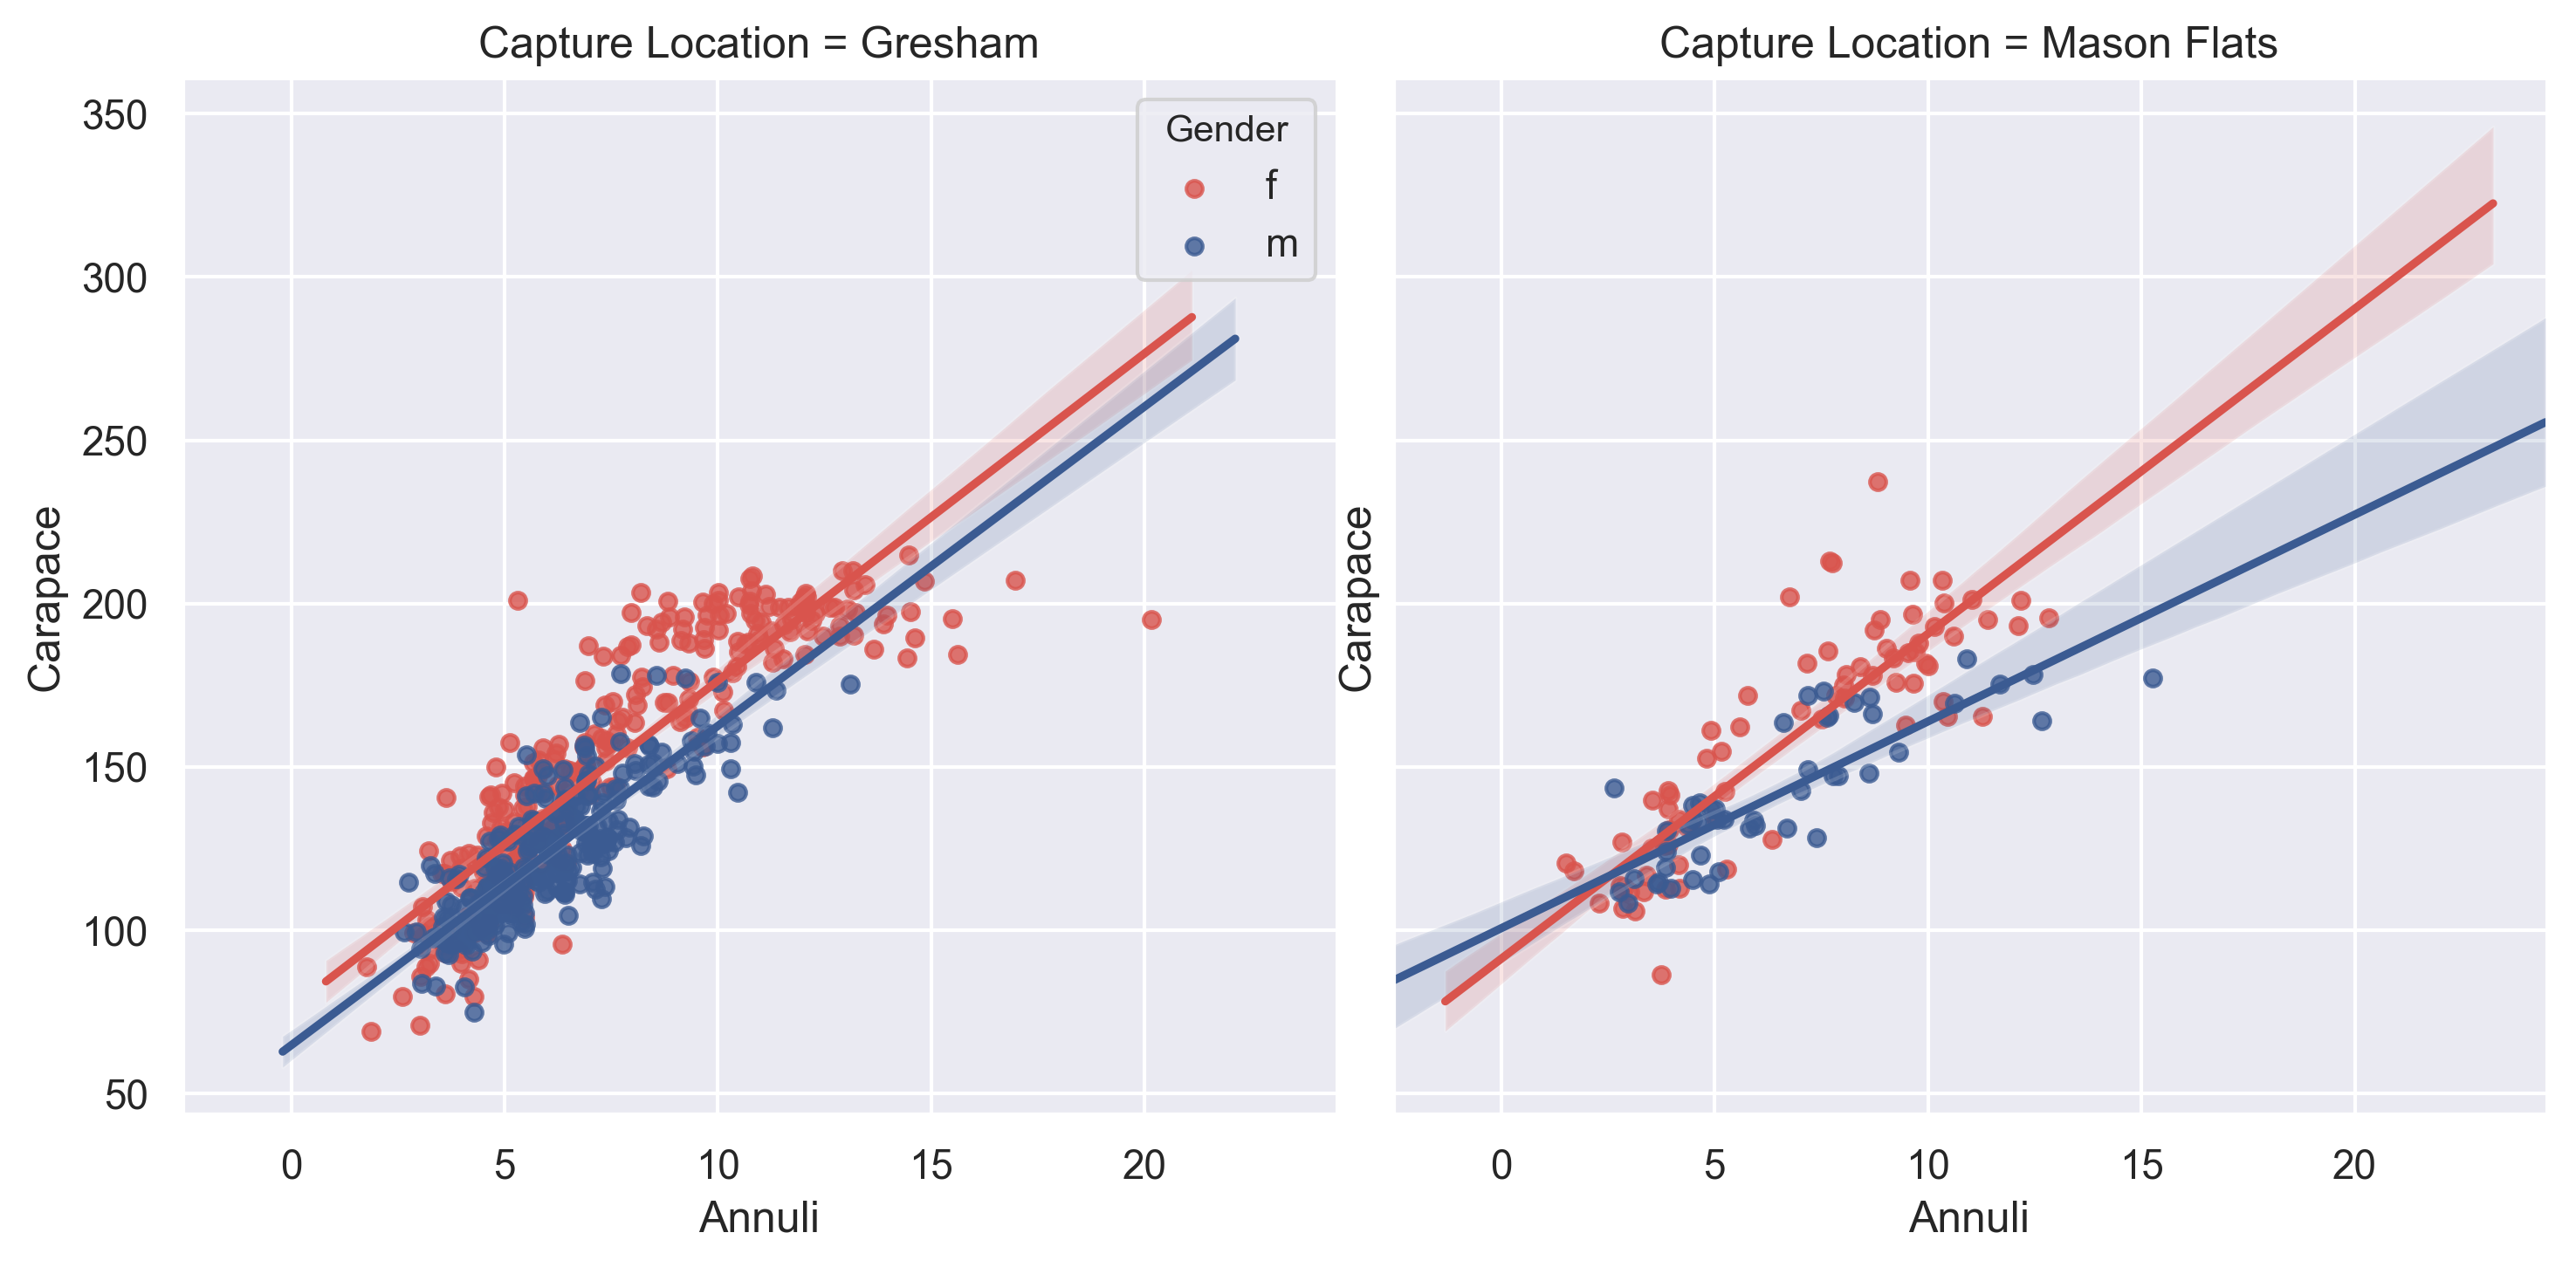

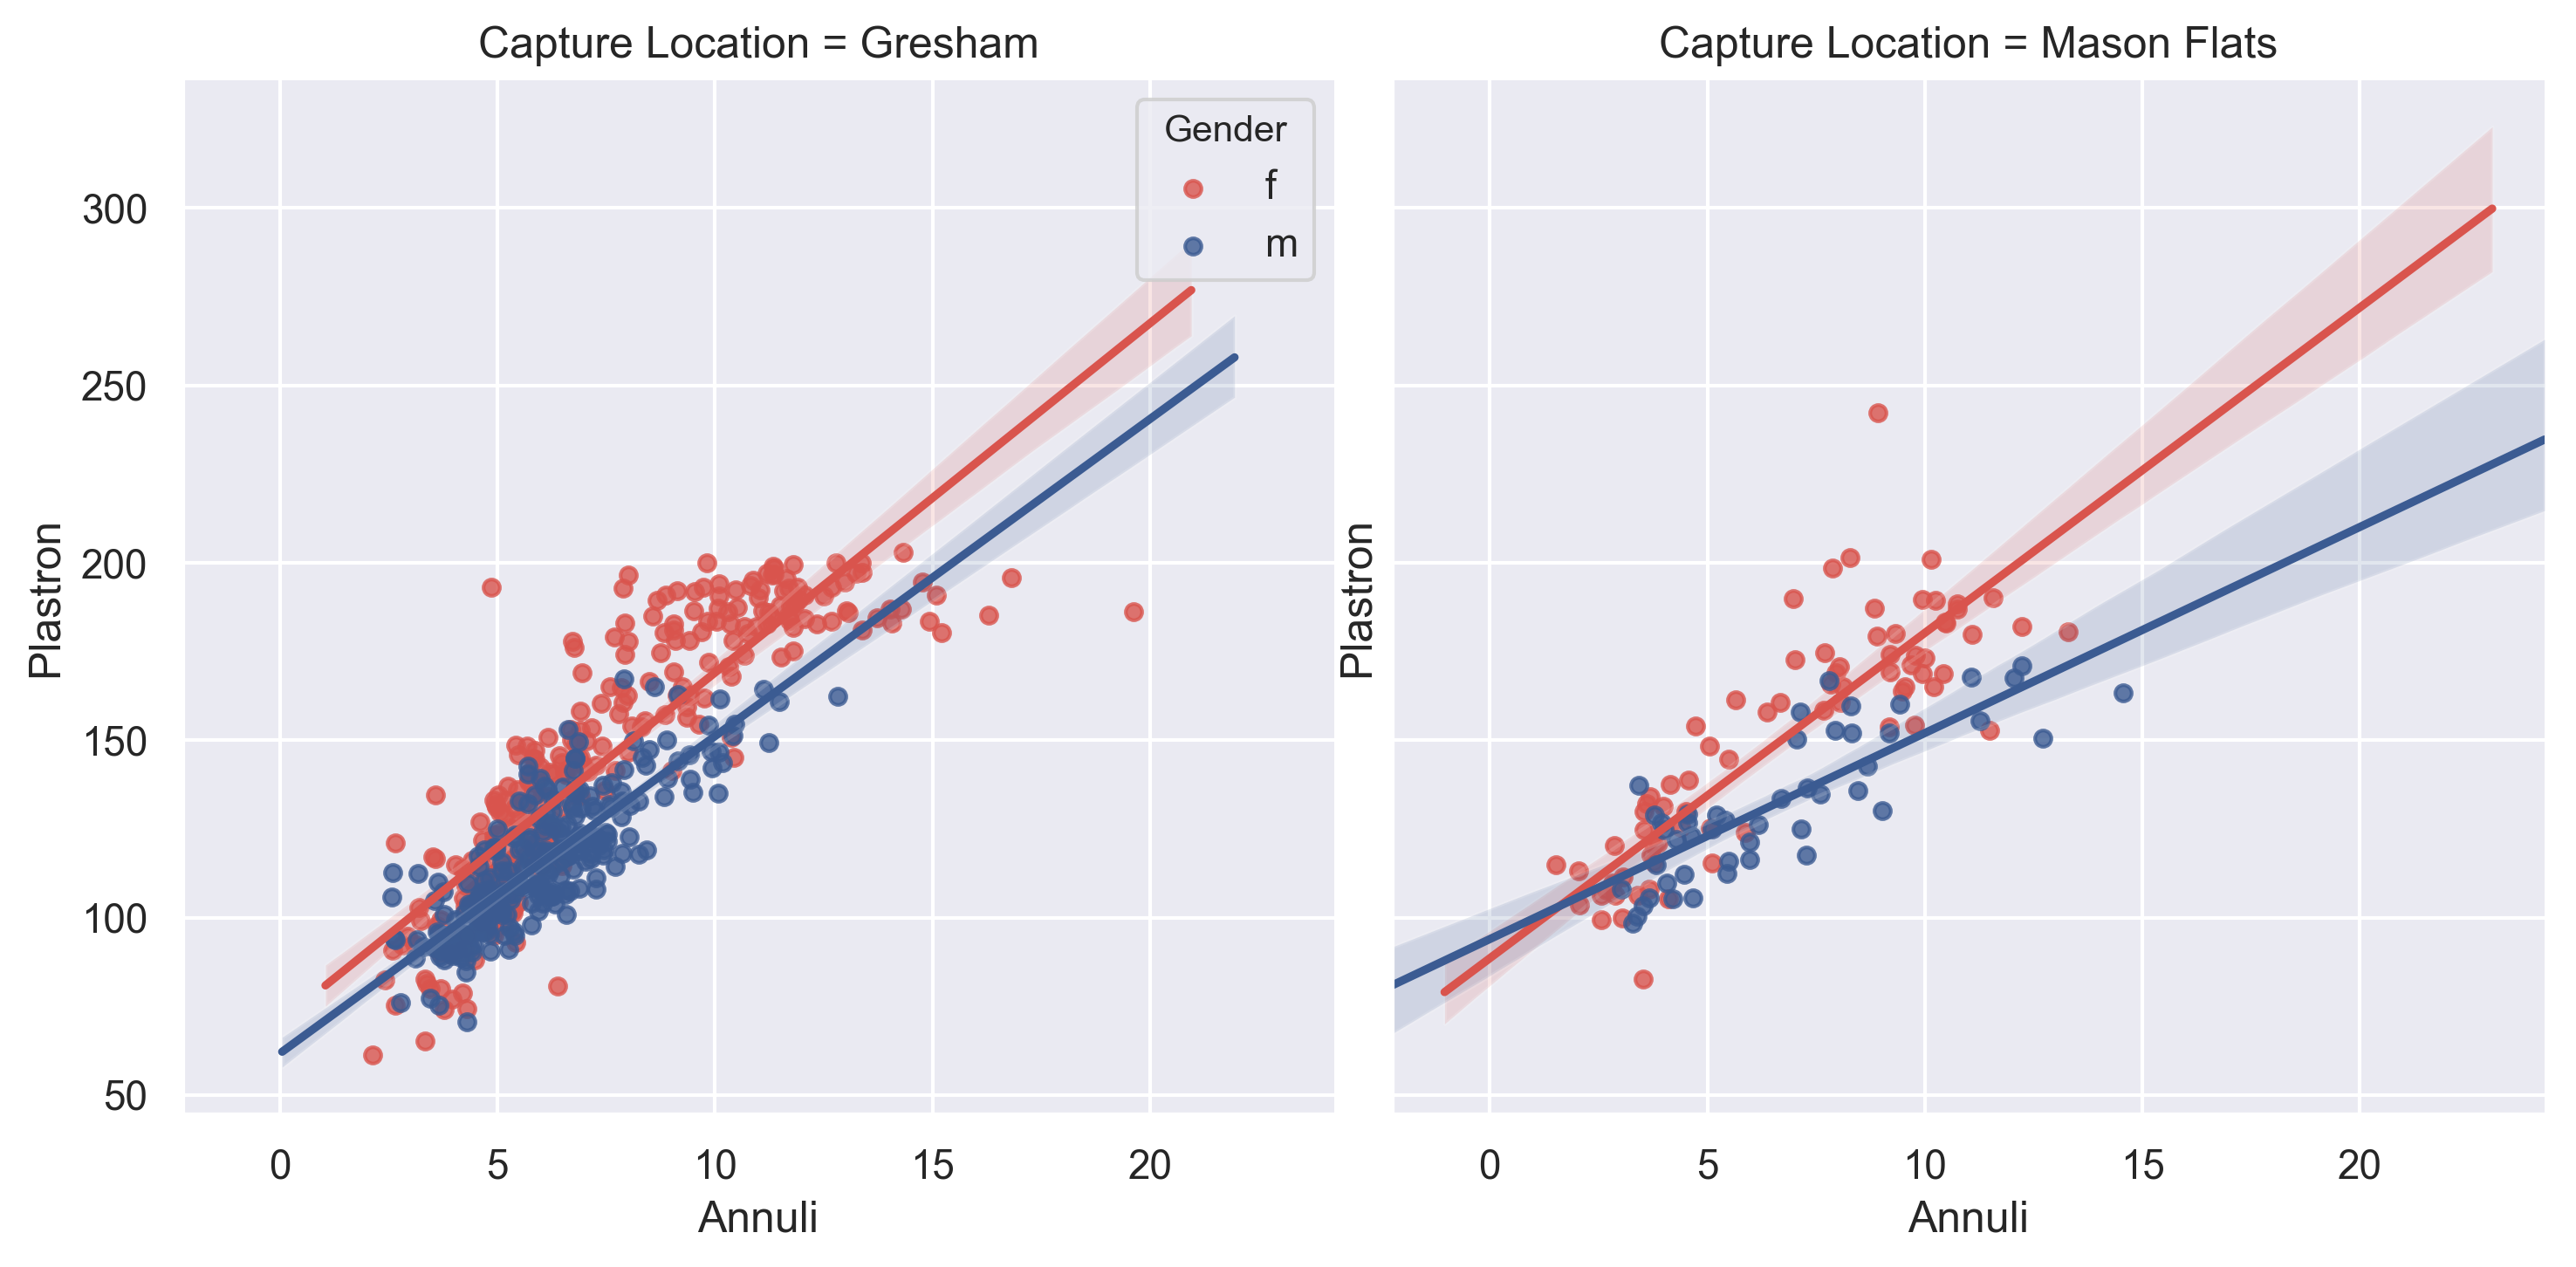

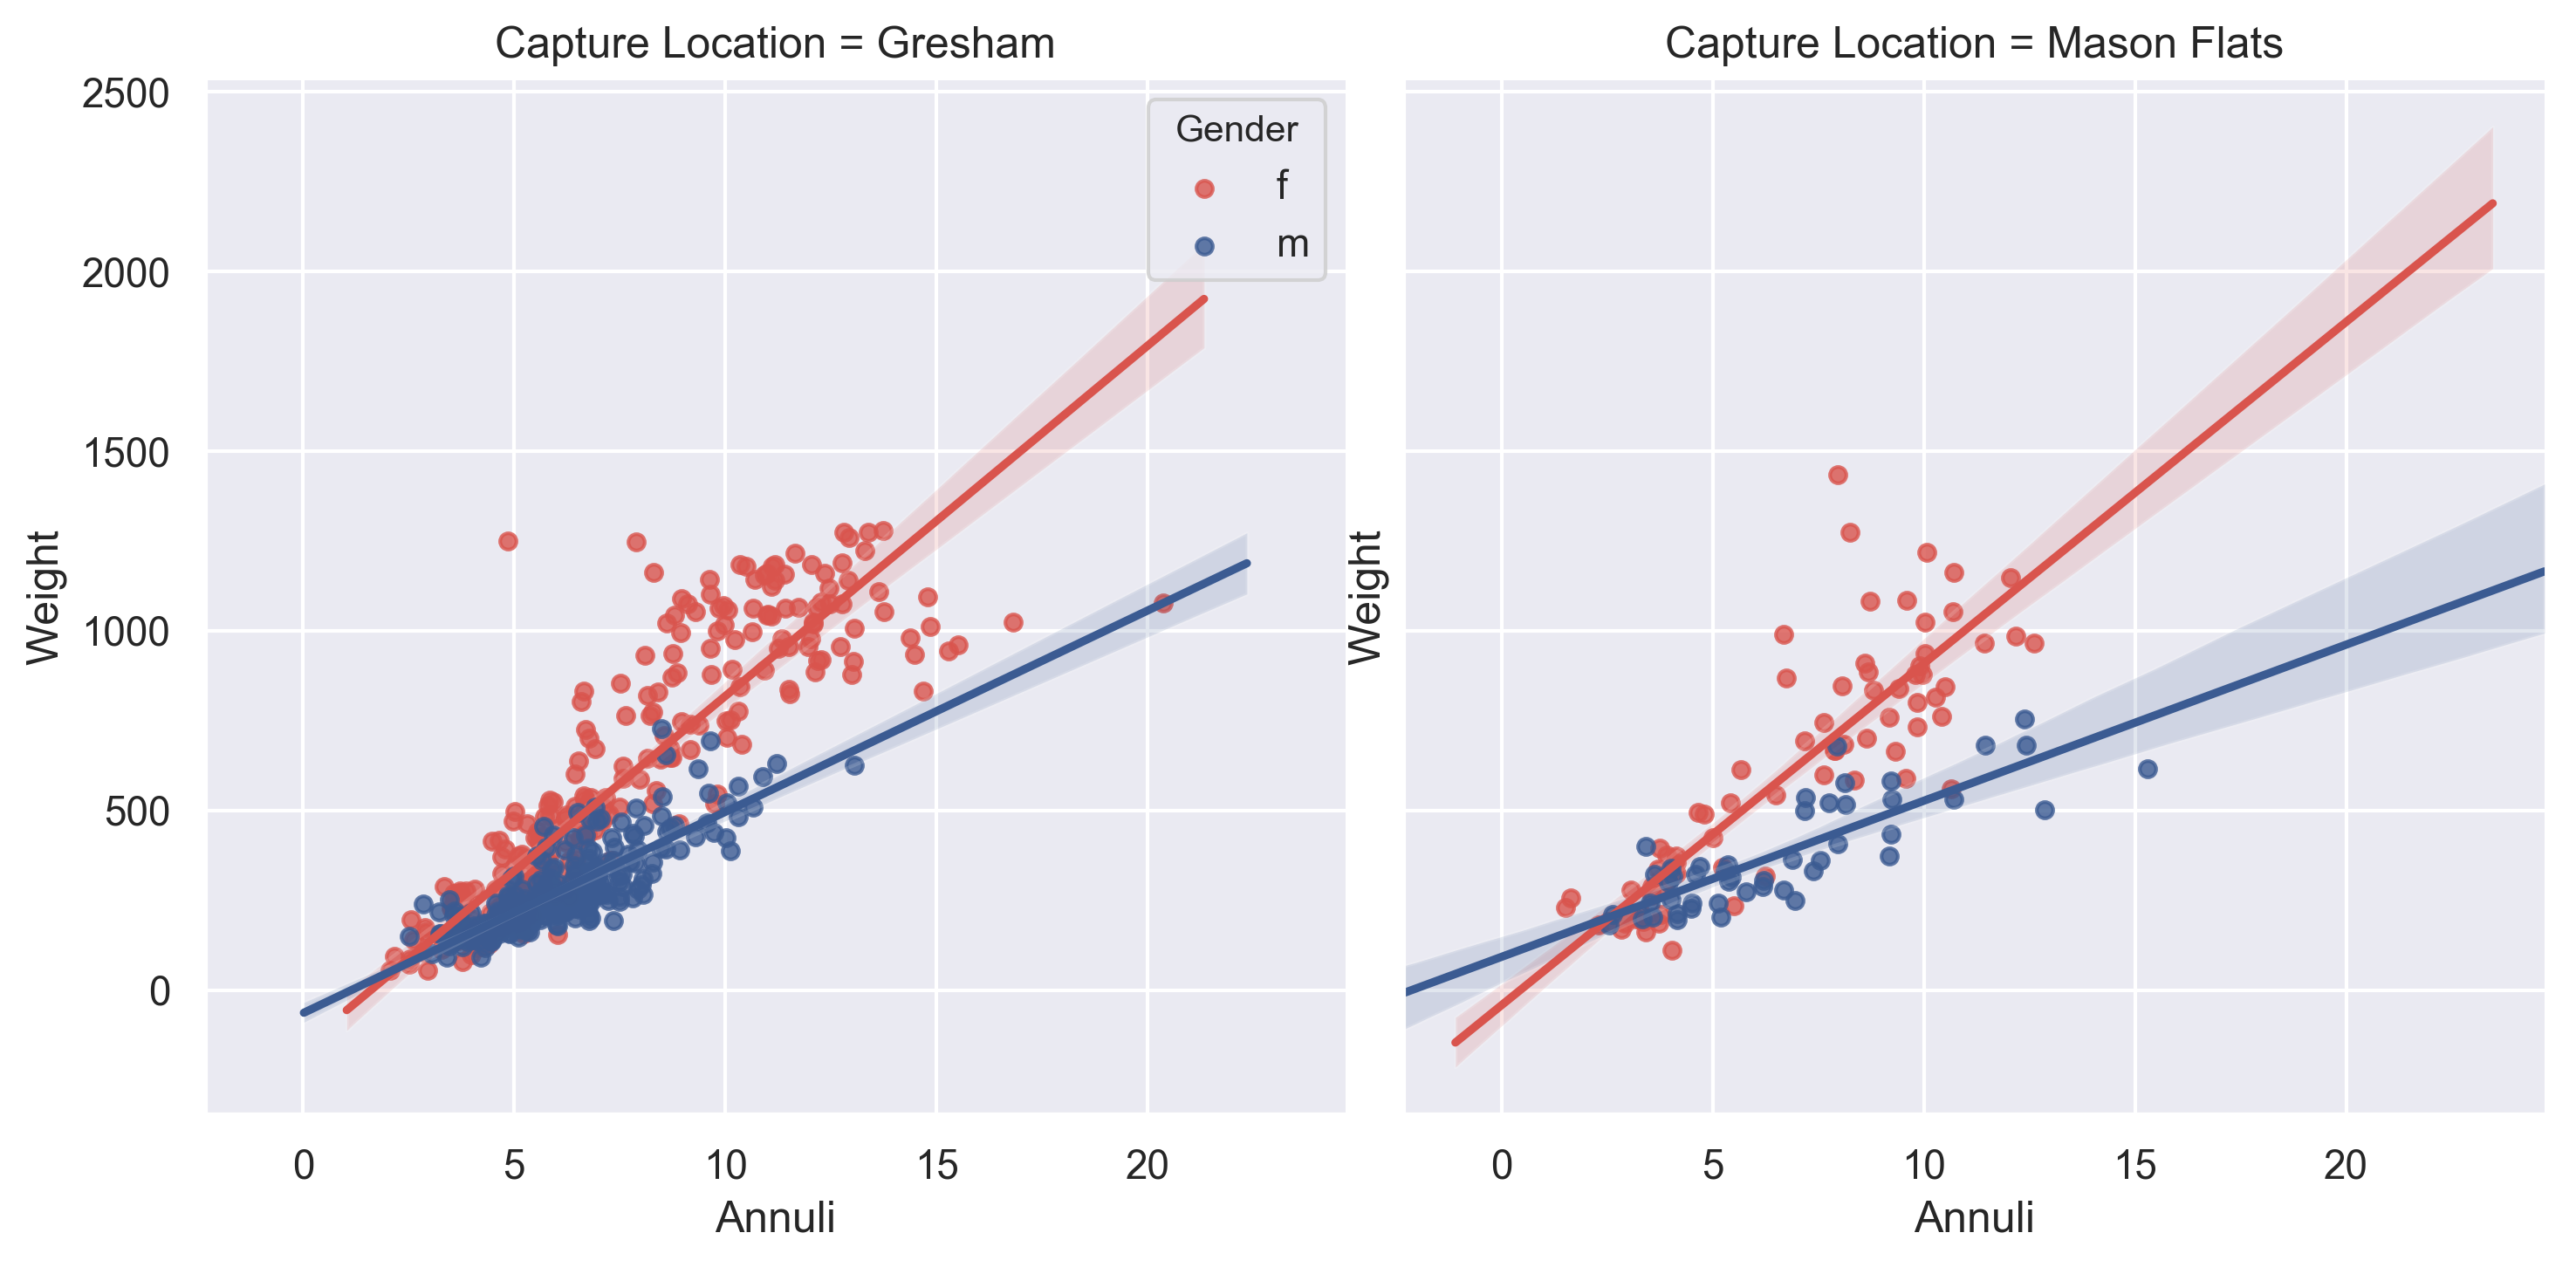

In [11]:
# scatterplot with linear digression 
#sns.set()
import statsmodels
natives = natives[natives['Gender']!='unknown']
is_robust = False


### Swarmplot with Hue and Linear Digression 
natives = natives[natives['Annuli']!=0]
#colors = [sns.xkcd_rgb['pale red'],sns.xkcd_rgb['denim blue'],sns.xkcd_rgb['medium green']]
colors = {'f':sns.xkcd_rgb['pale red'], 'm':sns.xkcd_rgb['denim blue'], 'unknown':sns.xkcd_rgb['medium green']}
plt.rcParams['figure.dpi'] = 300
print ("Plotting scatter plot with hue and linear digression with " + str(natives.Weight.count()) + ' samples...')
if (is_robust):
    print ("Estimating a robust regression. This will de-weight outliers. Tnis is substantially more computationally intensive")
sns.set()
_ = plt.figure(5)
_ = sns.lmplot(x='Annuli', y='Carapace', hue='Gender',col="Capture Location",data=natives,palette=colors,scatter=True, x_jitter=.5,y_jitter=.1,scatter_kws={"s": 20},robust=is_robust,legend_out=False)
_ = plt.ylabel('Carapace')
_ = sns.lmplot(x='Annuli', y='Plastron', hue='Gender',col="Capture Location",data=natives,palette=colors,scatter=True, x_jitter=.5,y_jitter=.1,scatter_kws={"s": 20},robust=is_robust,legend_out=False)
_ = plt.ylabel('Plastron')
_ = sns.lmplot(x='Annuli', y='Weight', hue='Gender',col="Capture Location",data=natives,palette=colors,scatter=True, x_jitter=.5,y_jitter=.1,scatter_kws={"s": 20},robust=is_robust,legend_out=False)
_ = plt.ylabel('Weight')


NEW ANNULI - Plotting scatter plot with hue and linear digression with 673 samples...


<Figure size 1920x1440 with 0 Axes>

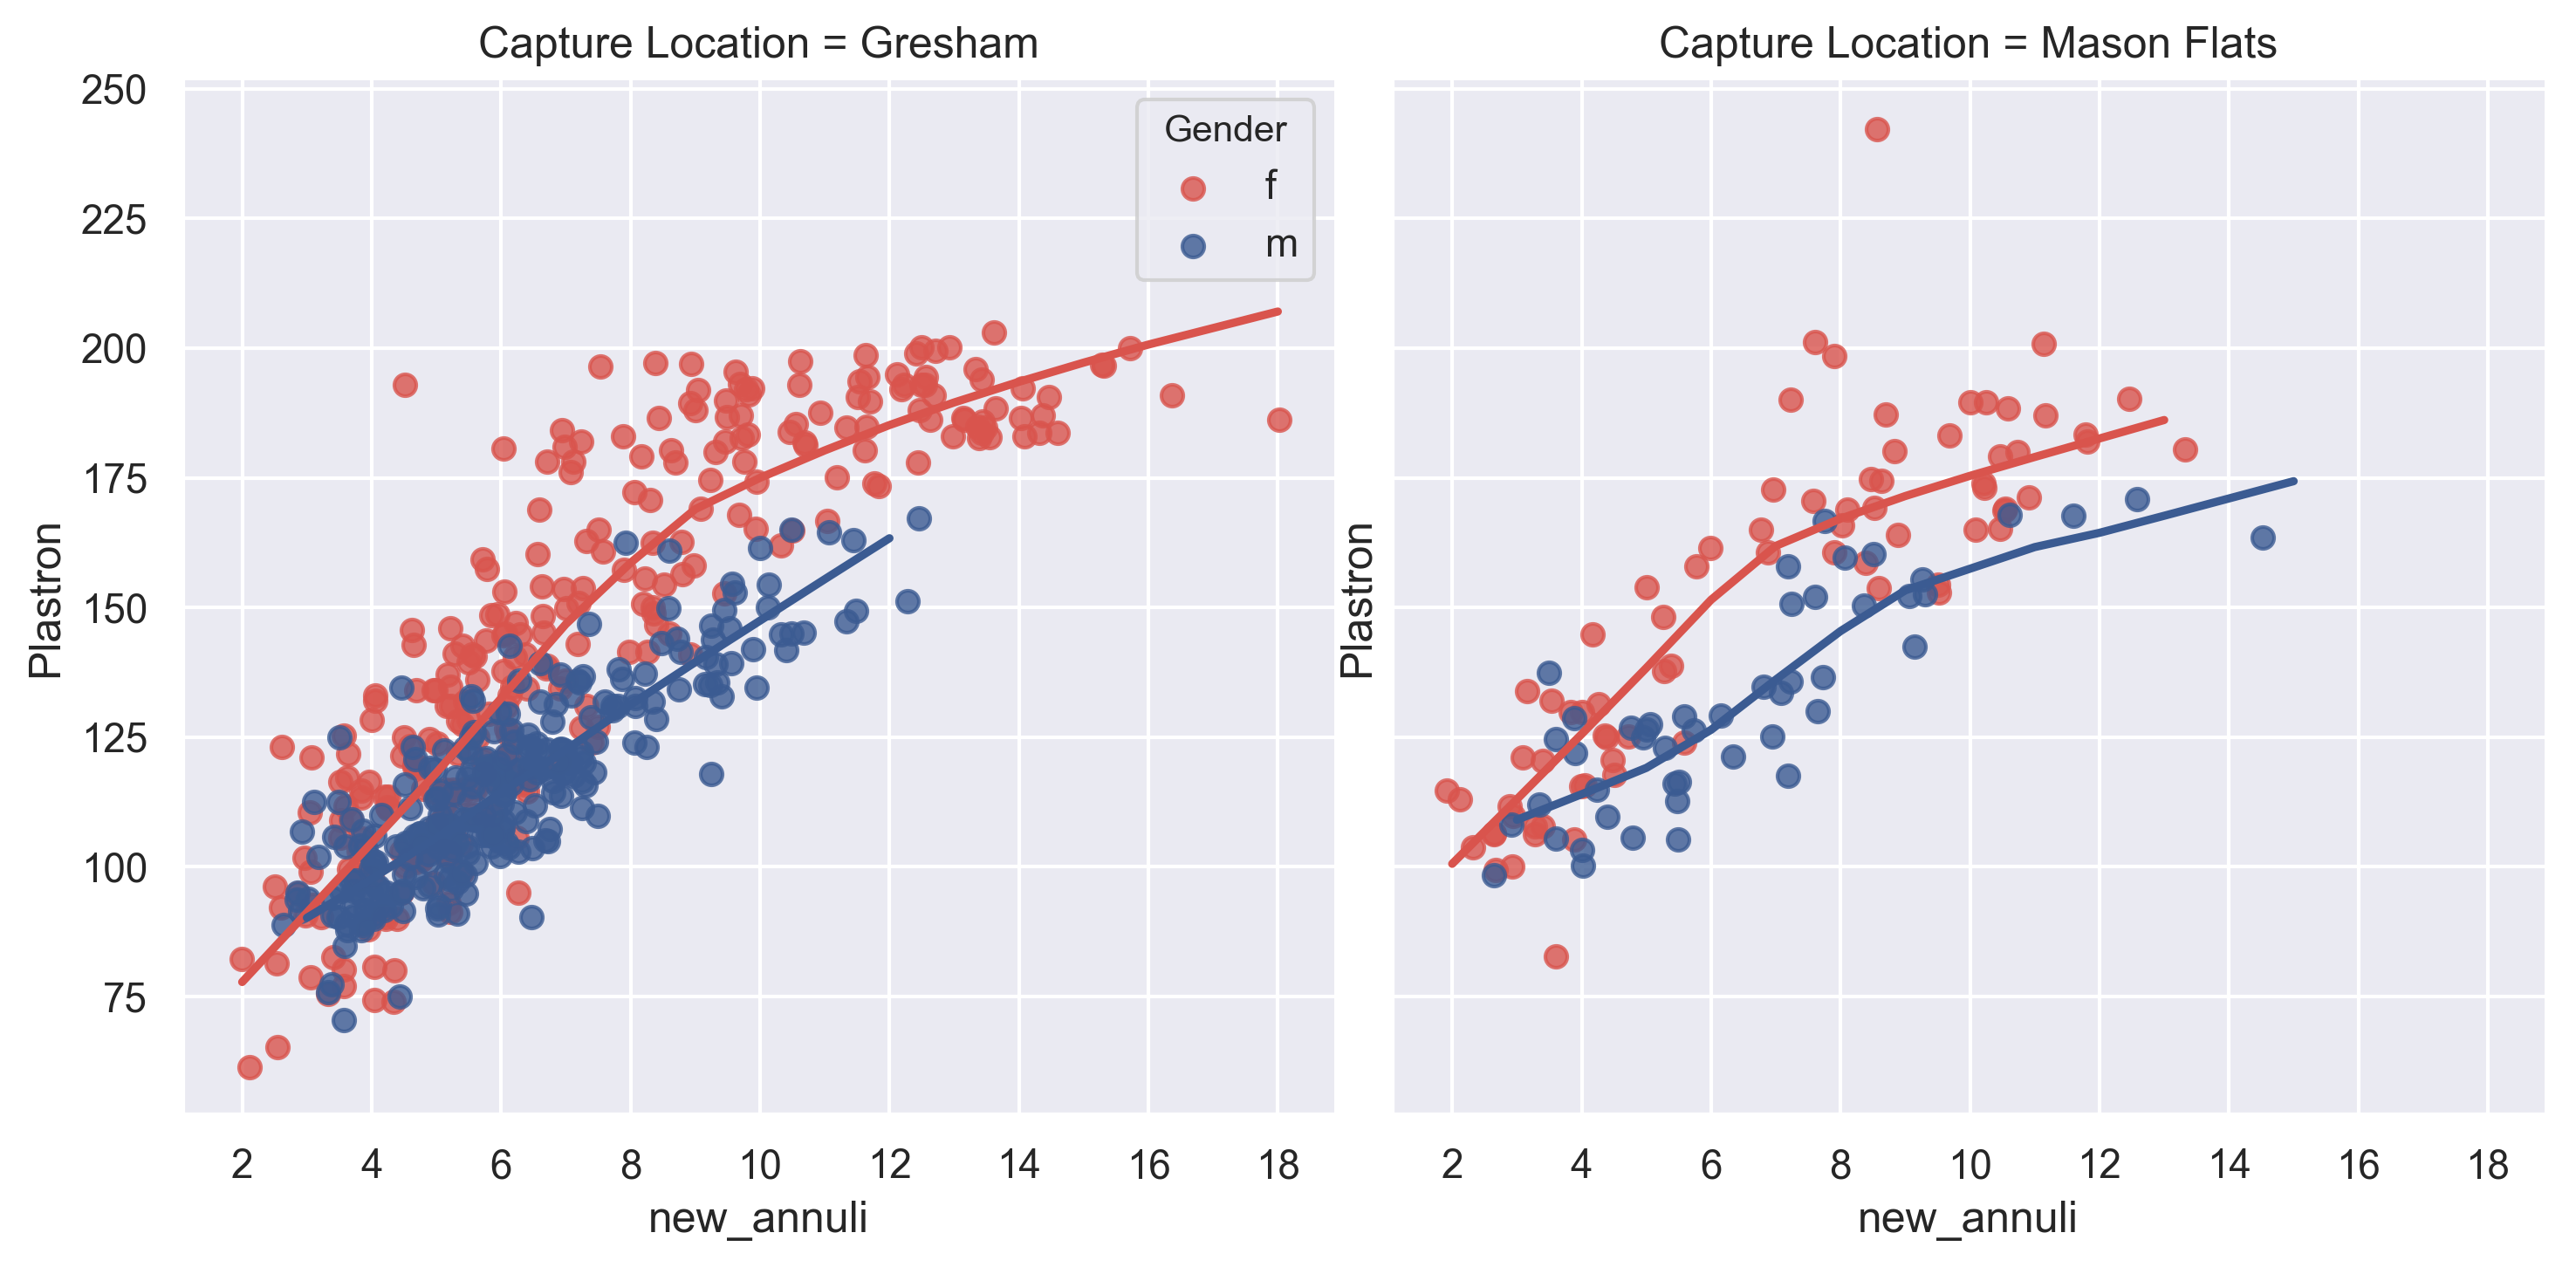

In [30]:
# scatterplot with linear digression 
#sns.set()
import statsmodels
natives = natives[natives['Gender']!='unknown']
is_robust = False


### Swarmplot with Hue and Linear Digression 
natives = natives[natives['new_annuli']!=0]
#colors = [sns.xkcd_rgb['pale red'],sns.xkcd_rgb['denim blue'],sns.xkcd_rgb['medium green']]
colors = {'f':sns.xkcd_rgb['pale red'], 'm':sns.xkcd_rgb['denim blue'], 'unknown':sns.xkcd_rgb['medium green']}
plt.rcParams['figure.dpi'] = 300
print ("NEW ANNULI - Plotting scatter plot with hue and linear digression with " + str(natives.Weight.count()) + ' samples...')
if (is_robust):
    print ("Estimating a robust regression. This will de-weight outliers. Tnis is substantially more computationally intensive")
sns.set()
_ = plt.figure(5)
# _ = sns.lmplot(x='new_annuli', y='Carapace', hue='Gender',col="Capture Location",data=natives,palette=colors,scatter=True, x_jitter=.5,y_jitter=.1,scatter_kws={"s": 20},robust=is_robust,legend_out=False)
# _ = plt.ylabel('Carapace')
# _ = sns.lmplot(x='new_annuli', y='Plastron', hue='Gender',col="Capture Location",data=natives,palette=colors,scatter=True, x_jitter=.5,y_jitter=.1,scatter_kws={"s": 20},robust=is_robust,legend_out=False)
# _ = plt.ylabel('Plastron')
# _ = sns.lmplot(x='new_annuli', y='Weight', hue='Gender',col="Capture Location",data=natives,palette=colors,scatter=True, x_jitter=.5,y_jitter=.1,scatter_kws={"s": 20},robust=is_robust,legend_out=False)
# _ = plt.ylabel('Weight')

# _ = sns.lmplot(x='new_annuli', y='Carapace', hue='Gender',col="Capture Location",data=natives,palette=colors,scatter=True,order=2, ci=None, scatter_kws={"s": 80},legend_out=False)
# _ = plt.ylabel('Carapace')
# _ = sns.lmplot(x='new_annuli', y='Plastron', hue='Gender',col="Capture Location",data=natives,palette=colors,scatter=True,order=2, ci=None, scatter_kws={"s": 80},legend_out=False)
# _ = plt.ylabel('Plastron')
# _ = sns.lmplot(x='new_annuli', y='Weight', hue='Gender',col="Capture Location",data=natives,palette=colors,scatter=True, order=2, ci=None, scatter_kws={"s": 80},legend_out=False)
# _ = plt.ylabel('Weight')

_ = sns.lmplot(x='new_annuli', y='Carapace', hue='Gender',col="Capture Location",data=natives,palette=colors,scatter=True,lowess=True,legend_out=False,x_jitter=.5,y_jitter=.1)
_ = plt.ylabel('Carapace')
_ = sns.lmplot(x='new_annuli', y='Plastron', hue='Gender',col="Capture Location",data=natives,palette=colors,scatter=True,lowess=True,legend_out=False,x_jitter=.5,y_jitter=.1)
_ = plt.ylabel('Plastron')
_ = sns.lmplot(x='new_annuli', y='Weight', hue='Gender',col="Capture Location",data=natives,palette=colors,scatter=True,lowess=True,legend_out=False,x_jitter=.5,y_jitter=.1)
_ = plt.ylabel('Weight')


In [13]:
# Print Regression Statistics
print('Linnear Regressions...')
for locations in captureLocations:
    for interestingValue in ['Carapace','Plastron','Weight']:
        for gender in ['f','m']:
            get_Linear_Regression_Stats(natives,'Annuli',interestingValue,gender,locations,True)


Linnear Regressions...
Annuli / Carapace (Filter: f + Gresham)
    slope     = 10.02
    intercept = 76.21
    r_value   = 0.88
    p_value   = 0.000000
    std_err   = 0.32
Annuli / Carapace (Filter: m + Gresham)
    slope     = 9.77
    intercept = 64.84
    r_value   = 0.84
    p_value   = 0.000000
    std_err   = 0.39
Annuli / Plastron (Filter: f + Gresham)
    slope     = 9.85
    intercept = 70.54
    r_value   = 0.88
    p_value   = 0.000000
    std_err   = 0.32
Annuli / Plastron (Filter: m + Gresham)
    slope     = 8.94
    intercept = 61.70
    r_value   = 0.83
    p_value   = 0.000000
    std_err   = 0.36
Annuli / Weight (Filter: f + Gresham)
    slope     = 97.48
    intercept = -156.55
    r_value   = 0.88
    p_value   = 0.000000
    std_err   = 3.09
Annuli / Weight (Filter: m + Gresham)
    slope     = 56.01
    intercept = -64.17
    r_value   = 0.83
    p_value   = 0.000000
    std_err   = 2.33
Annuli / Carapace (Filter: f + Mason Flats)
    slope     = 9.95
    interc

In [14]:
#Hyposis: same distribution in all capture locations
native_portland = natives[(natives['Capture Location']=='Mason Flats')]
native_gresham = natives[(natives['Capture Location']=='Gresham') ]
#&(natives['Gender']=='f')
genders = ['f','m']
dimension = 'Weight'
_ = plt.figure(6)
i = 0
for gender in genders:
    i += 1
    _ = plt.subplot(1,2,i)
    for _ in range(100):
        # Generate permutation samples
        native_portland_gender = native_portland[native_portland['Gender']==gender]
        native_gresham_gender = native_portland[native_portland['Gender']==gender]
        perm_sample_1, perm_sample_2 = hlp.permutation_sample(native_portland_gender[dimension],native_gresham_gender[dimension])

        # Compute ECDFs
        x_1, y_1 = hlp.ecdf(perm_sample_1)
        x_2, y_2 = hlp.ecdf(perm_sample_2)

        # Plot ECDFs of permutation sample
        _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                     color='green', alpha=0.02)
        _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                     color='orange', alpha=0.02)

    # Create and plot ECDFs from original data
    x_1, y_1 = hlp.ecdf(native_portland_gender[dimension])
    x_2, y_2 = hlp.ecdf(native_portland_gender[dimension])
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='green',label='Portland')
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='orange',label='Gresham')
    _ = plt.legend()
    _ = plt.title(gender)
    # Label axes, set margin, and show plot
    plt.margins(0.02)
    _ = plt.xlabel(dimension)
    _ = plt.ylabel('ECDF')
plt.show()

In [15]:
#Hyposis: DIFFERENT distribution between genders
native_females = natives[(natives['Gender']=='f')]
native_males = natives[(natives['Gender']=='m')]
#&(natives['Gender']=='f')
dimension = 'Weight'
_ = plt.figure(7)
for _ in range(100):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = hlp.permutation_sample(native_females[dimension],native_males[dimension])

    # Compute ECDFs
    x_1, y_1 = hlp.ecdf(perm_sample_1)
    x_2, y_2 = hlp.ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = hlp.ecdf(native_females[dimension])
x_2, y_2 = hlp.ecdf(native_males[dimension])
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red',label='female')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue',label='male')
_ = plt.legend()
_ = plt.title('Permutation Sampling by Gender')
# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel(dimension)
_ = plt.ylabel('ECDF')
plt.show()



# Correlation

In [16]:
native_females.info()
corrleations = native_females.loc[slice(None),['Annuli','Weight','Carapace','Plastron']].corr()

_ = sns.heatmap(corrleations,annot=True)
_ = plt.xticks(rotation=45)
_ = plt.show()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 0 to 203
Data columns (total 38 columns):
Date                            358 non-null datetime64[ns]
ID                              358 non-null object
Time                            237 non-null object
Surveyor(s)                     75 non-null object
Weather                         165 non-null object
Capture Location                358 non-null object
Capture Method                  357 non-null object
Recapture                       357 non-null object
Species                         358 non-null object
Gender                          358 non-null object
Annuli                          358 non-null int8
Weight                          358 non-null float32
Carapace                        358 non-null float32
Plastron                        358 non-null float32
Gravid                          296 non-null object
Nest#                           13 non-null object
Nest Site                       16 non-null object
Margi